## EDA (EXPLORATORY DATA ANALYSIS)
### 1. Limpieza de datos

permalink                4856
name                     4857
homepage_url             8305
category_list            8817
 market                  8824
 funding_total_usd       4856
status                   6170
country_code            10129
state_code              24133
region                  10129
city                    10972
funding_rounds           4856
founded_at              15740
founded_month           15812
founded_quarter         15812
founded_year            15812
first_funding_at         4856
last_funding_at          4856
seed                     4856
venture                  4856
equity_crowdfunding      4856
undisclosed              4856
convertible_note         4856
debt_financing           4856
angel                    4856
grant                    4856
private_equity           4856
post_ipo_equity          4856
post_ipo_debt            4856
secondary_market         4856
product_crowdfunding     4856
round_A                  4856
round_B                  4856
round_C   

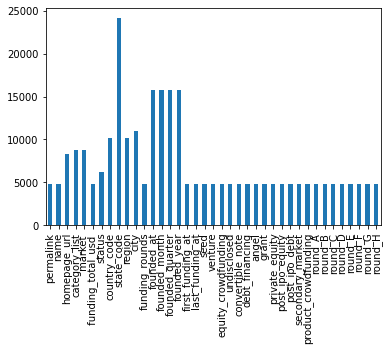

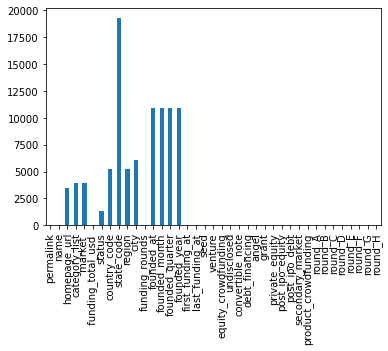

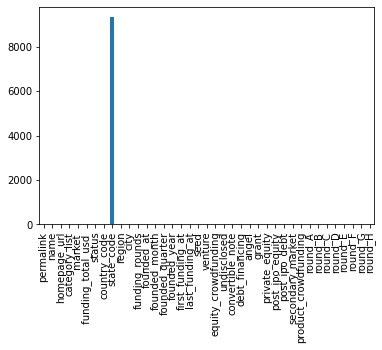

16.0
6.0


,permalink,name,homepage_url,category_list,market,status,country_code,state_code,region,city,...,round_C,round_D,round_E,round_F,round_G,round_H,funding_total,from_founding_to_funding,from_first_to_last_funding,from_founding_to_last_funding
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,acquired,USA,NY,New York City,New York,...,0.0,0.0,0.0,0.0,0.0,0.0,1750000.0,2505600000000000,0,2505600000000000
3,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,operating,GBR,NaN,London,London,...,0.0,0.0,0.0,0.0,0.0,0.0,1500000.0,0,0,0
8,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,|Software|,Software,operating,USA,IL,"Springfield, Illinois",Champaign,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,143856000000000000,0,143856000000000000
10,/organization/1-2-3-listo,"1,2,3 Listo",http://www.123listo.com,|E-Commerce|,E-Commerce,operating,CHL,NaN,Santiago,Las Condes,...,0.0,0.0,0.0,0.0,0.0,0.0,40000.0,35769600000000000,0,35769600000000000
15,/organization/10-minutes-with,10 Minutes With,http://10minuteswith.com,|Education|,Education,operating,GBR,NaN,London,London,...,0.0,0.0,0.0,0.0,0.0,0.0,4400000.0,0,55814400000000000,55814400000000000


In [1]:

#IMPORTAMOS LIBRERIAS GENERALES
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

#IMPORTAMOS EL FICHERO CSV INVESTMENT_VC
df = pd.read_csv('../data/raw/investments_VC.csv', encoding='latin_1', sep=',')


#COMPROBAMOS SI HAY VALORES NAN Y LOS REPRESENTAMOS GRAFICAMENTE
print(df.isna().sum())

df.isna().sum().plot(kind="bar")
plt.show()

#Eliminamos las ultimas filas que solo contienen Nan
df_clean = df.dropna(how='all')

df_clean.isna().sum().plot(kind="bar")
plt.show()

#Eliminamos las filas que contienen Nan, excepto los Nan de la columna State_code
#Las columna de State_code es exclusiva para las startups de USA
seleccion = df_clean.columns[2:8]
df_clean = df_clean.dropna(subset=seleccion, how='any')

seleccion2 = df_clean.columns[10:]
df_clean = df_clean.dropna(subset=seleccion2, how='any')

df_clean.isna().sum().plot(kind="bar")
plt.show()


#INVESTIGAMOS EL DATASET

#print(df_clean.info())
#print(df_clean.shape)
#print(df_clean.describe())
#print(df_clean.columns)


#CREAR UNA NUEVA COLUMNA 'funding_total' CON LA SUMA DE TODOS LOS FUNDINGS QUE RECIBE CADA STARTUP
#SE CREA ESTA COLUMNA PORQUE LA COLUMNA EXISTENTE ' funding_total_usd ' PRESENTA ERRORES EN LOS DATOS
#ELIMINAMOS LA COLUMNA ' funding_total_usd ' QUE PRESENTA ERRORES EN LOS DATOS
df_clean['funding_total'] = df_clean[df_clean.columns[17:30]].sum(axis=1) 
df_clean = df_clean.drop([' funding_total_usd '], axis=1)

#REDUCIR A SOLO STARTUPS FUNDADAS DE 2005 EN ADELANTE
millennials = df_clean['founded_year'] > 2004
df_clean = df_clean[millennials]

#ELIMINAMOS LAS STARTUPS DE CHINA PARA NO CONTAMINAR LOS DATOS
#BUSCAMOS PREDECIR EL FUNDING EXTERNOS QUE PUEDA RECIBIR UNA STARTUP
#LAS STARTUPS DE CHINA RECIBEN FINANCIACION DEL ESTADO, POR LO QUE CONTAMINAN EL DATO DE FUNDING
chinese = df_clean[df_clean['country_code'] == 'CHN'].index
df_clean = df_clean.drop(chinese)

#DETECTAR Y ELIMINAR OUTLIERS DENTRO DE LA VARIABLE FUNDING_TOTAL
q_funding = df_clean['funding_total'].quantile(0.9)

'''
#COMPROBAMOS LA INFO DE LOS OUTLIERS PARA ANALIZARLOS ANTES DE ELIMINARLOS
df_outliers = df_clean[df_clean['funding_total'] > q_funding]
print('\nEstos son las startups outliers en funding\n')
display(df_outliers)

print('La media de inversion en outliers es: ', round(df_outliers['funding_total'].mean(),2))
print('La MEDIANA de inversion en outliers es: ', round(df_outliers['funding_total'].median(),2))
print('La MODA de inversion en outliers es: ', round(df_outliers['funding_total'].mode(),2))
print('El MINIMO de inversion en outliers es: ', round(df_outliers['funding_total'].min(),2))
print('EL MAXIMO de inversion en outliers es: ', round(df_outliers['funding_total'].max(),2))
print('La VARIACION de inversion en outliers es: ', round(df_outliers['funding_total'].var(),2))
print('La STD DEV de inversion en outliers es: ', round(df_outliers['funding_total'].std(),2), '\n')

#comprobar cual es la startup con max funding
print('\nEsta es la startup con max funding\n')
print(df_outliers[['name', 'funding_total']].agg([np.max]))
'''
df_clean = df_clean[df_clean['funding_total'] < q_funding]


#ELIMINAMOS LOS OUTLIERS QUE TIENEN MUCHAS RONDAS DE FINANCIACION (17, cuando la media es 1.8)

#COMPROBAMOS EL MAX, MEAN Y PERCENTIL 99 DE LOS FUNDING ROUNDS
print(df_clean['funding_rounds'].max())
print(df_clean['funding_rounds'].quantile(0.99))
df_clean['funding_rounds'].mean()

q_funding_rounds = df_clean['funding_rounds'].quantile(0.99)
df_clean = df_clean[df_clean['funding_rounds'] < q_funding_rounds]

#ELIMINAMOS EL ERROR EN LOS DATOS EN LA FECHA DE PRIMERA FINANCIACION
df_clean = df_clean[df_clean['first_funding_at'] >= '2005-01-01']

df_clean = df_clean[df_clean['last_funding_at'] >= '2005-01-01']

df_clean = df_clean[df_clean['founded_at'] >= '2005-01-01']

#Transformamos el formato de la columna con la fecha de la primera inversión recibida de 'object' a 'datetime'
df_clean['first_funding_at'] = pd.to_datetime(df_clean['first_funding_at'])

#Transformamos el formato de la columna con la fecha de la última inversión recibida de 'object' a 'datetime'
df_clean['last_funding_at'] = pd.to_datetime(df_clean['last_funding_at'])

#Transformamos el formato de la columna con la fecha de la última inversión recibida de 'object' a 'datetime'
df_clean['founded_at'] = pd.to_datetime(df_clean['founded_at'])

#ELIMINAMOS LAS STARTUPS QUE APARECEN CON FINANCIACION ANTES DE SU CREACION
#ESTO PUEDE OCURRIR EN LA REALIDAD, SOBRE TODO EN FASES INICIALES COMO LA SEED Y PRE-SEED
#SIN EMBARGO MUCHOS SERAN ERRORES YA QUE LA DEIFFERENCIA ENTRE FIRST FUNDING Y FOUNDED DE ALGUNAS ES DE AÑOS
df_clean = df_clean[df_clean['founded_at'] <= df_clean['first_funding_at']]


#HAY STARTUPS QUE RECIVIERON FUNDING ANTES DE SU FUNDACION, LAS ANALIZAMOS Y VEMOS CUANTOS DIAS ANTES

'''
df_error = df_clean[df_clean['founded_at'] > df_clean['first_funding_at']]

#CREAMOS UNA NUEVA COLUMNA CON LA DIFERENCIA DE DIAS Y LO ORDENAMOS DE FORMA DESCENDENTE
df_error['diff_found_first_funding'] = df_error['founded_at'] - df_error['first_funding_at']
df_error = df_error.sort_values(by=['diff_found_first_funding'], ascending=False)


df_error[['founded_at', 'first_funding_at', 'diff_found_first_funding']]
df_error[df_error['diff_found_first_funding'] > '1000 days']

DESPUES DE ANALIZARLAS, HE DECIDO ELIMINARLAS DEL DATAFRAME YA QUE ES UN NUMERO PEQUEÑO,
ADEMAS ES DIFICIL ESTABLECER UNA FRONTERA PARA DECIDIR SI ELIMINAR UNOS U OTROS 
DEPENDIENDO EN LA DIFERENCIA ENTRE FIRST FUNDING Y FOUNDED_AT

ALGUNAS STARTUPS RECIBEN FUNDING EXTERNO ANTES DE SER FUNDADAS, EN LA FASE PRE-SEED, DONDE TODAVIA SON UNA IDEA Y NO UNA SOCIEDAD O COMPANIA
SIN EMBARGO, HAY MUCHAS STARTUPS CON AÑOS DE DIFERENCIA ENTRE FIRST FUNDING Y FOUNDED DATE
'''
#Comprobamos si las 3 columnas se han transformado al formato datetime64
#print(df_clean.dtypes)

#CREAMOS COLUMNAS SINTETICAS PARA MOSTRAR EL TIEMPO TRANSCURRIDO ENTRE:
#FROM FOUNDED TO FIRST FUNDING
df_clean['from_founding_to_funding'] = pd.to_numeric(df_clean['first_funding_at'] - df_clean['founded_at'])

#FROM FIRST FUNDING TO LAST FUNDING
df_clean['from_first_to_last_funding'] = pd.to_numeric(df_clean['last_funding_at'] - df_clean['first_funding_at'])
#df_clean['from_first_to_last_funding'] = pd.to_numeric(df_clean['from_first_to_last_funding'])

#FROM FOUNDED TO LAST FUNDING
df_clean['from_founding_to_last_funding'] = pd.to_numeric(df_clean['last_funding_at'] - df_clean['founded_at'])

#IMPRIMIMOS LAS ESTADISTICAS
'''
print('FROM FOUNDED TO FIRST FUNDING')
print(df_clean['from_founding_to_funding'].mean())
print(df_clean['from_founding_to_funding'].median())
print(df_clean['from_founding_to_funding'].max())

print('FROM FIRST FUNDING TO LAST FUNDING')
print(df_clean['from_first_to_last_funding'].mean())
print(df_clean['from_first_to_last_funding'].median())
print(df_clean['from_first_to_last_funding'].max())

print('FROM FOUNDED TO LAST FUNDING')
print(df_clean['from_founding_to_last_funding'].mean())
print(df_clean['from_founding_to_last_funding'].median())
print(df_clean['from_founding_to_last_funding'].max())
'''

df_clean.head()


### 2. Mathematical Expectation
#### 2.1 Por tipo de industria

Numero total de startups en el set:  19599
Numero total de sectores unicos en el set:  672
Numero total de sectores unicos en la agrupacion:  672

COMPROBAMOS SI HAY ALGUN NAN


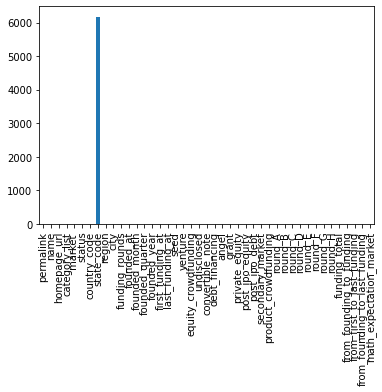

,market,startups,startups_percentage,expected_in_top,startups_top,math_expectation
227,Fitness,28,0.142864,1.428644,1.0,-30.003571


In [2]:

#AGRUPAMOS LAS STARTUPS POR INDUSTRIA Y CALCULAMOS EL TOTAL QUE TENEMOS
total_startups = (df_clean.groupby(' market ')['name'].count()).sum()

print('Numero total de startups en el set: ', total_startups)
print('Numero total de sectores unicos en el set: ', len(df_clean[' market '].unique()))

#CREAMOS UN DATAFRAME DEL AGRUPAMIENTO PARA TRABAJAR CON EL 
group_industry = pd.DataFrame(df_clean.groupby(' market ')['name'].count())
group_industry.reset_index(inplace=True)
group_industry.rename(columns={'name':'startups'}, inplace=True)
print('Numero total de sectores unicos en la agrupacion: ', len(group_industry[' market '].unique()))

#ANADIMOS UNA COLUMNA CON EL % DE STARTUPS POR INDUSTRIA COMPARADO CON EL TOTAL
group_industry['startups_percentage'] = (group_industry['startups'] / total_startups) * 100

#ANADIMOS UNA COLUMNA CON EL NUMERO DE STARTUPS POR INDUSTRIA QUE DEBERIA HABER ENTRE LAS 1000 CON MAYOR FUNDING
group_industry['expected_in_top'] = (group_industry['startups_percentage'] * 1000)/ 100

#ORDENAMOS POR EL TOTAL FUNDING Y SELECCIONAMOS LAS 1000 PRIMERAS
df_clean.sort_values(by='funding_total', ascending=False, inplace=True)
top_1000 = df_clean[:1000]

#AGRUPAMOS ESAS 1000 STARTUPS POR SECTOR Y CONTAMOS CUANTAS HAY DE CADA SECTOR Y ORDENAMOS EN UN DATAFRAME
top_1000 = top_1000.groupby(' market ')['name'].count()
top_1000.sort_values(ascending=False, inplace=True)
top_1000 = pd.DataFrame(data=top_1000)
top_1000.reset_index(inplace=True)
top_1000.rename(columns={'name':'startups_top'}, inplace=True)

#UNIMOS ESE DATAFRAME DE TOP1000 CON EL PRIMER DATAFRAME DEL GRUPO POR SECTOR
#HACEMOS UN LEFT JOIN Y RELLENAMOS LOS NAN CON 0
join_industry_top = group_industry.merge(top_1000, how='left', on=' market ')
join_industry_top['startups_top'] = join_industry_top['startups_top'].fillna(0)


#FINALMENTE, CREAMOS UNA COLUMNA QUE CALCULA LA ESPERANZA MATEMATICA
#ESPERANZA MATEMATICA = (STARTUPS EN EL TOP1000 - LAS QUE DEBERIA HABER EN EL TOP1000) / ESAS QUE DEBERIA HABER EN EL TOP1000 * 100
join_industry_top['math_expectation'] = ((join_industry_top['startups_top'] - join_industry_top['expected_in_top']) / join_industry_top['expected_in_top'])*100
join_industry_top.sort_values(by='math_expectation', ascending=False, inplace=True)

#YA TENEMOS NUESTRA ESPERANZA MATEMATICA POR SECTOR
#YA PODEMOS CREAR UNA COLUMNA EN NUESTRO DATAFRAME PRINCIPAL PARA MOSTRARLA, LA RELLENAMOS DE 0 INICIALMENTE
df_clean['math_expectation_market'] = 0

#CREAMOS UN DICCIONARIO EN EL QUE JUNTAREMOS LOS SECTORES CON SUS ESPERANZAS MATEMATICAS
dicc = {}
for i, j in zip(join_industry_top[' market '], join_industry_top['math_expectation']):
    dicc[i] = j

#MAPEAMOS LOS SECTORES CON SUS ESPERANZAS MATEMATICAS EN LA COLUMNA 'math_expectation_market
df_clean['math_expectation_market'] = df_clean[' market '].map(dicc) 
df_clean.sort_values(by='math_expectation_market', ascending=False, inplace=True)


#COMPROBAMOS SI HA QUEDADO ALGUN NAN
print('\nCOMPROBAMOS SI HAY ALGUN NAN')
df_clean.isna().sum().plot(kind="bar")
plt.show()

#REPRESENTAMOS GRAFICAMENTE LA MATH_EXP DPOR SECTOR
import plotly.express as px
mathexp_more_than_30  = join_industry_top[join_industry_top['startups'] > 30]

mathexp_group_industry_top = mathexp_more_than_30.sort_values(by='math_expectation', ascending=False)
mathexp_group_industry_top

fig13 = px.bar(mathexp_group_industry_top[:10], x=' market ', y='math_expectation',
            color=' market ',
             labels={' market ': 'Industries', 'math_expectation':'Mathematical expectation per industry'}, height=400)
fig13.show()

fig14 = px.bar(mathexp_group_industry_top[-10:], x=' market ', y='math_expectation',
            color=' market ',
             labels={' market ': 'Industries', 'math_expectation':'Mathematical expectation per industry'}, height=400)
fig14.show()

#COMPROBAMOS EL EJEMPLO DEL SECTOR FITNESS PARA COMPROBAR QUE LA MATH_EXP SE HA CALCULADO CORRECTAMENTE
join_industry_top[join_industry_top[' market '] == ' Fitness ']


### 2. Mathematical Expectation
#### 2.2 Math Exp por país

Numero total de startups en el set:  19599
Numero total de PAISes unicos en el set:  98
Numero total de PAISes unicos en la agrupacion:  98

COMPROBAMOS SI HAY ALGUN NAN


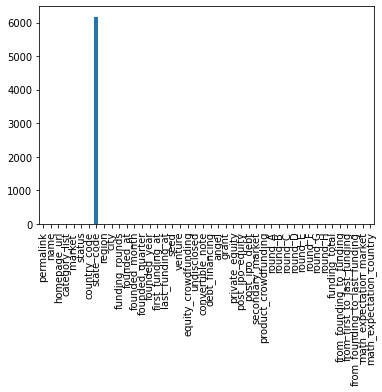

,country_code,startups,startups_percentage,expected_in_top,startups_top,math_expectation
15,CHE,96,0.489821,4.898209,2.0,-59.16875


In [3]:

#AGRUPAMOS LAS STARTUPS POR INDUSTRIA Y CALCULAMOS EL TOTAL QUE TENEMOS
group_country_count = (df_clean.groupby('country_code')['name'].count()).sum()

print('Numero total de startups en el set: ', group_country_count)
print('Numero total de PAISes unicos en el set: ', len(df_clean['country_code'].unique()))

#CREAMOS UN DATAFRAME DEL AGRUPAMIENTO PARA TRABAJAR CON EL 
group_country = pd.DataFrame(df_clean.groupby('country_code')['name'].count())
group_country.reset_index(inplace=True)
group_country.rename(columns={'name':'startups'}, inplace=True)
print('Numero total de PAISes unicos en la agrupacion: ', len(group_country['country_code'].unique()))

#ANADIMOS UNA COLUMNA CON EL % DE STARTUPS POR PAIS COMPARADO CON EL TOTAL
group_country['startups_percentage'] = (group_country['startups'] / group_country_count) * 100

#ANADIMOS UNA COLUMNA CON EL NUMERO DE STARTUPS POR PAIS QUE DEBERIA HABER ENTRE LAS 1000 CON MAYOR FUNDING
group_country['expected_in_top'] = (group_country['startups_percentage'] * 1000)/ 100

#ORDENAMOS POR EL TOTAL FUNDING Y SELECCIONAMOS LAS 1000 PRIMERAS
df_clean.sort_values(by='funding_total', ascending=False, inplace=True)
top_1000_country = df_clean[:1000]

#AGRUPAMOS ESAS 1000 STARTUPS POR PAIS Y CONTAMOS CUANTAS HAY DE CADA PAIS Y ORDENAMOS EN UN DATAFRAME
top_1000_country = top_1000_country.groupby('country_code')['name'].count()
top_1000_country.sort_values(ascending=False, inplace=True)
top_1000_country = pd.DataFrame(data=top_1000_country)
top_1000_country.reset_index(inplace=True)
top_1000_country.rename(columns={'name':'startups_top'}, inplace=True)

#UNIMOS ESE DATAFRAME DE TOP1000 CON EL PRIMER DATAFRAME DEL GRUPO POR PAIS
#HACEMOS UN LEFT JOIN Y RELLENAMOS LOS NAN CON 0
join_country_top = group_country.merge(top_1000_country, how='left', on='country_code')
join_country_top['startups_top'] = join_country_top['startups_top'].fillna(0)


#FINALMENTE, CREAMOS UNA COLUMNA QUE CALCULA LA ESPERANZA MATEMATICA
#ESPERANZA MATEMATICA = (STARTUPS EN EL TOP1000 - LAS QUE DEBERIA HABER EN EL TOP1000) / ESAS QUE DEBERIA HABER EN EL TOP1000 * 100
join_country_top['math_expectation'] = ((join_country_top['startups_top'] - join_country_top['expected_in_top']) / join_country_top['expected_in_top'])*100
join_country_top.sort_values(by='math_expectation', ascending=False, inplace=True)

#YA TENEMOS NUESTRA ESPERANZA MATEMATICA POR PAIS
#YA PODEMOS CREAR UNA COLUMNA EN NUESTRO DATAFRAME PRINCIPAL PARA MOSTRARLA, LA RELLENAMOS DE 0 INICIALMENTE
df_clean['math_expectation_country'] = 0

#CREAMOS UN DICCIONARIO EN EL QUE JUNTAREMOS LOS PAISES CON SUS ESPERANZAS MATEMATICAS
dicc = {}
for i, j in zip(join_country_top['country_code'], join_country_top['math_expectation']):
    dicc[i] = j

#MAPEAMOS LOS PAISES CON SUS ESPERANZAS MATEMATICAS EN LA COLUMNA 'math_expectation_country'
df_clean['math_expectation_country'] = df_clean['country_code'].map(dicc) 
df_clean.sort_values(by='math_expectation_country', ascending=False, inplace=True)


#COMPROBAMOS SI HA QUEDADO ALGUN NAN
print('\nCOMPROBAMOS SI HAY ALGUN NAN')
df_clean.isna().sum().plot(kind="bar")
plt.show()

#REPRESENTAMOS GRAFICAMENTE LA MATH_EXP DPOR PAIS
import plotly.express as px
mathexp_more_than_20  = join_country_top[join_country_top['startups'] > 20]

mathexp_group_country_top = mathexp_more_than_20.sort_values(by='math_expectation', ascending=False)
mathexp_group_country_top

fig13 = px.bar(mathexp_group_country_top[:10], x='country_code', y='math_expectation',
            color='country_code',
             labels={'country_code': 'Best Countries', 'math_expectation':'Mathematical expectation per country'}, height=400)
fig13.show()

fig14 = px.bar(mathexp_group_country_top[-10:], x='country_code', y='math_expectation',
            color='country_code',
             labels={'country_code': 'Worst Countries', 'math_expectation':'Mathematical expectation per country'}, height=400)
fig14.show()

#COMPROBAMOS EL EJEMPLO DEL PAIS 'CHE' = SUIZA, PARA COMPROBAR QUE LA MATH_EXP SE HA CALCULADO CORRECTAMENTE
join_country_top[join_country_top['country_code'] == 'CHE']


### Finalmente, guardamos el DataFrame df_clean para poder abrirlo y aplicar nuestros modelos

In [4]:
#df_clean.to_csv('startup_funding_df_clean.csv')

In [5]:
df_clean.columns

Index(['permalink', 'name', 'homepage_url', 'category_list', ' market ',
       'status', 'country_code', 'state_code', 'region', 'city',
       'funding_rounds', 'founded_at', 'founded_month', 'founded_quarter',
       'founded_year', 'first_funding_at', 'last_funding_at', 'seed',
       'venture', 'equity_crowdfunding', 'undisclosed', 'convertible_note',
       'debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_equity',
       'post_ipo_debt', 'secondary_market', 'product_crowdfunding', 'round_A',
       'round_B', 'round_C', 'round_D', 'round_E', 'round_F', 'round_G',
       'round_H', 'funding_total', 'from_founding_to_funding',
       'from_first_to_last_funding', 'from_founding_to_last_funding',
       'math_expectation_market', 'math_expectation_country'],
      dtype='object')

## MACHINE LEARNING
### 1. Data Preparation

In [104]:
#LIBRERIAS UTILIZADAS PARA MACHINE LEARNING

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
import sklearn 
from sklearn.tree import plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.metrics import r2_score
import phik
#import xgboost
from sklearn.feature_selection import SelectKBest, chi2
import tensorflow as tf
from tensorflow import keras

from numpy import array
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import HuberRegressor
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import TransformedTargetRegressor
from numpy import mean
from numpy import absolute
import warnings
warnings.filterwarnings("ignore")


In [7]:
#Modificamos la variable status a valores numericos que ayuden a predecir al dividirla en 3 clases
print(df_clean['status'].unique())
dicc_status = {
    'operating': 1, 
    'acquired': 2, 
    'closed': 0
}

df_clean['status'] = df_clean['status'].map(dicc_status)

['operating' 'acquired' 'closed']


In [8]:
#COMPROBAMOS LOS VALORES MINIMOS DE LAS ESPERANZAS MATEMATICAS
print(df_clean['math_expectation_market'].min()) #OUTPUT: -100
print(df_clean['math_expectation_country'].min()) #OUTPUT: -100

#SUMAMOS 100 A AMBAS PARA QUE EL MINIMO SEA 0 Y NO UN VALOR NEGATIVO Y ASI PODER USAR SELECTKBEST MAS ADELANTE
df_clean['math_expectation_market'] = df_clean['math_expectation_market'] +100
df_clean['math_expectation_country'] = df_clean['math_expectation_country'] +100

#COMPROBAMOS QUE AHORA NO HAY VALORES NEGATIVOS
print(df_clean['math_expectation_market'].min())
df_clean['math_expectation_country'].min()

-100.0
-100.0
0.0


0.0

In [9]:
#DEFINIMOS VARIABLES
#DEFINIMOS UNA QUE CONTENGA TODAS LAS VARIABLES, CATEGORICAS Y NUMERICAS
X_todo_cat_num = df_clean[['permalink', 'name', 'homepage_url', 'category_list', ' market ',
       'status', 'country_code', 'state_code', 'region', 'city',
       'funding_rounds', 'founded_at', 'founded_month', 'founded_quarter',
       'founded_year', 'first_funding_at', 'last_funding_at', 'seed',
       'venture', 'equity_crowdfunding', 'undisclosed', 'convertible_note',
       'debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_equity',
       'post_ipo_debt', 'secondary_market', 'product_crowdfunding', 'round_A',
       'round_B', 'round_C', 'round_D', 'round_E', 'round_F', 'round_G',
       'round_H', 'funding_total', 'from_founding_to_funding',
       'from_first_to_last_funding', 'from_founding_to_last_funding',
       'math_expectation_market', 'math_expectation_country']]

#DEFINIMOS X e y
#ELIMINAMOS DE LA X LA COLUMNA DE VENTURE PORQUE TIENE DEMASIADA CORRELACION CON NUESTRO TARGET.
#VENTURE ES LA INVERSION DE VENTURE CAPITALS (GRUPOS DE INVERSION) QUE ES EN PARTE LO QUE QUEREMOS PREDECIR
#ELIMINAMOS DESDE LA ROUND_C EN ADELANTE PORQUE LA SUMA DE TODOS LOS ROUNDS = TARGET (y)
X = df_clean[['status',
       'funding_rounds', 'founded_year', 'seed',
       'equity_crowdfunding', 'undisclosed', 'convertible_note',
       'debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_equity',
       'post_ipo_debt', 'secondary_market', 'product_crowdfunding', 'from_founding_to_funding',
       'from_first_to_last_funding', 'from_founding_to_last_funding','math_expectation_market',
       'math_expectation_country']]
y = df_clean['venture']

#FIJAMOS UNA SEMILLA PARA PODER USARLA SIEMPRE CON EL MISMO VALOR MAS ADELANTE
seed = 42
size = 0.2

#SEPARAMOS X E y EN TRAIN Y TEST
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= size, random_state=seed)

### 2. Tranformacion y Feature Engineering

#### 2.1 Estandarizacion de las variables

In [10]:
print('SHAPES')
print('X shape', X.shape)
print('X train shape', X_train.shape)
print('X test shape', X_test.shape)
print('y shape', y.shape)
print('y train shape', y_train.shape)
print('y test shape', y_test.shape, '\n')

SHAPES
X shape (19599, 20)
X train shape (15679, 20)
X test shape (3920, 20)
y shape (19599,)
y train shape (15679,)
y test shape (3920,) 



In [11]:
#ESTANDARIZAMOS LOS DATOS NUMERICOS
scale = StandardScaler()

df_transformed = scale.fit_transform(X_train, y_train)
X_test_transformed = scale.transform(X_test)

y_train_trans = y_train
#y_test_trans = scale.transform(y_test)
df_transformed =pd.DataFrame(df_transformed, columns= X_train.columns)
df_transformed




,status,funding_rounds,founded_year,seed,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,from_founding_to_funding,from_first_to_last_funding,from_founding_to_last_funding,math_expectation_market,math_expectation_country
0,0.001137,-0.626731,1.632133,0.913943,-0.047047,-0.057195,-0.067816,-0.151431,-0.190125,-0.057417,-0.078447,-0.021703,-0.011076,-0.008219,-0.021561,-0.621880,-0.539647,-0.844797,-0.340139,0.511744
1,2.972379,0.499130,-1.750969,-0.423136,-0.047047,-0.057195,-0.067816,-0.151431,-0.190125,-0.057417,-0.078447,-0.021703,-0.011076,-0.008219,-0.021561,-0.374417,0.737659,0.078553,-0.697186,0.511744
2,0.001137,-0.626731,-0.482306,-0.423136,-0.047047,-0.057195,-0.067816,-0.151431,-0.190125,-0.057417,-0.078447,-0.021703,-0.011076,-0.008219,-0.021561,0.839550,-0.539647,0.439685,-0.345184,0.511744
3,0.001137,0.499130,1.209245,-0.423136,-0.047047,-0.057195,-0.067816,-0.151431,-0.190125,-0.057417,-0.078447,-0.021703,-0.011076,-0.008219,-0.021561,-0.942492,0.183169,-0.727155,0.342481,0.511744
4,0.001137,-0.626731,0.363469,2.381471,-0.047047,-0.057195,-0.067816,-0.151431,-0.190125,-0.057417,-0.078447,-0.021703,-0.011076,-0.008219,-0.021561,0.495593,-0.539647,0.137374,-0.452969,0.511744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15674,2.972379,-0.626731,0.786357,-0.423136,-0.047047,-0.057195,-0.067816,-0.151431,-0.190125,-0.057417,-0.078447,-0.021703,-0.011076,-0.008219,-0.021561,-0.408657,-0.539647,-0.657391,-0.697186,0.511744
15675,0.001137,-0.626731,-1.750969,-0.423136,-0.047047,-0.057195,-0.067816,-0.151431,-0.190125,-0.057417,-0.078447,-0.021703,-0.011076,-0.008219,-0.021561,3.641014,-0.539647,2.901950,-0.345184,0.511744
15676,0.001137,-0.626731,-0.905194,-0.423136,-0.047047,-0.057195,-0.067816,-0.151431,-0.190125,-0.057417,-0.078447,-0.021703,-0.011076,-0.008219,-0.021561,2.497083,-0.539647,1.896525,0.434780,0.511744
15677,0.001137,0.499130,-0.059418,-0.097019,-0.047047,-0.057195,4.571218,-0.151431,-0.190125,-0.057417,-0.078447,-0.021703,-0.011076,-0.008219,-0.021561,0.943827,0.336644,1.015581,-0.047918,0.511744


#### 2.2 Matriz de Correlacion de Pearson

<AxesSubplot:>

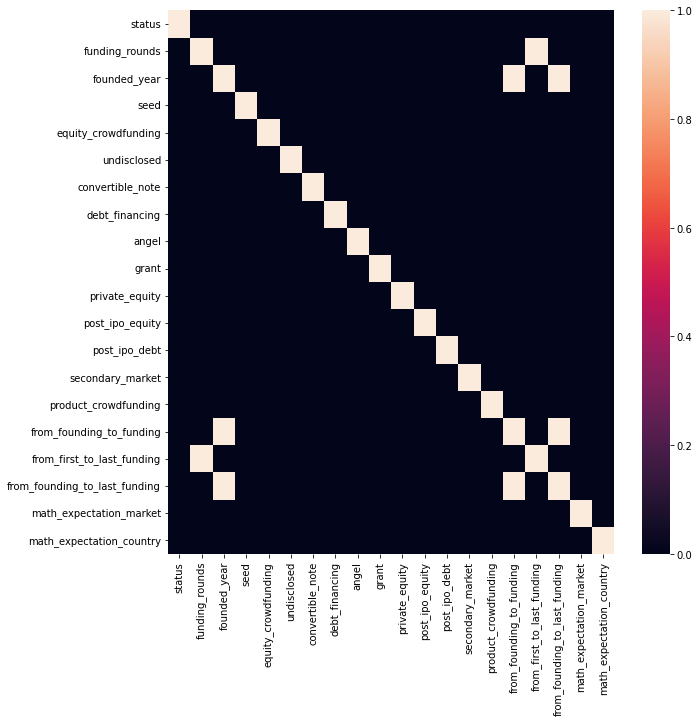

In [39]:
#SACAMOS UN HEATMAP DE LA CORRELACION LINEAL ENTRE VARIABLES NUMERICAS

fig, ax = plt.subplots(figsize=(10,10))  
umb= 0.5
sns.heatmap((df_transformed.corr() < -umb).astype(int) + (df_transformed.corr() > umb).astype(int))


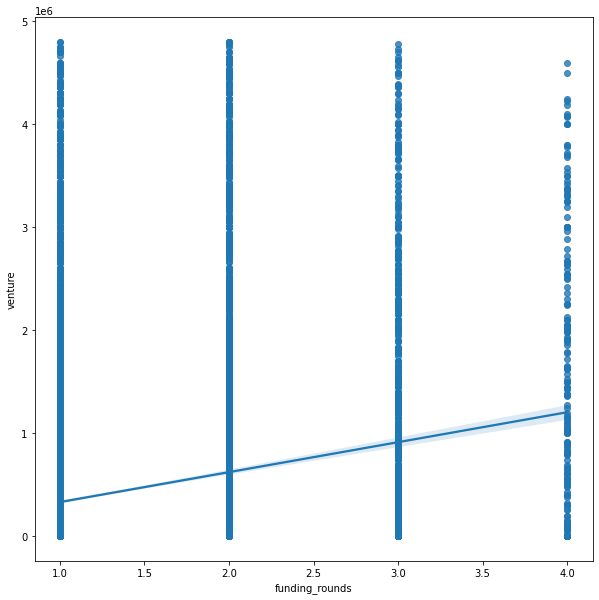

In [40]:
#VEMOS VISUALMENTE LA RELACION ENTRE EL NUMERO DE RONDAS DE FINANCIACION Y EL TOTAL DE FINANCIACION LEVANTADO
fig, ax = plt.subplots(figsize=(10,10))  
sns.regplot(data = df_clean,
           x = 'funding_rounds', y= 'venture');

#### 2.3 Matriz de PHIK. Correlacion, Significance y Outliers

interval columns not set, guessing: ['status', 'funding_rounds', 'founded_year', 'seed', 'equity_crowdfunding', 'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_equity', 'post_ipo_debt', 'secondary_market', 'product_crowdfunding', 'from_founding_to_funding', 'from_first_to_last_funding', 'from_founding_to_last_funding', 'math_expectation_market', 'math_expectation_country']
interval columns not set, guessing: ['status', 'funding_rounds', 'founded_year', 'seed', 'equity_crowdfunding', 'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_equity', 'post_ipo_debt', 'secondary_market', 'product_crowdfunding', 'from_founding_to_funding', 'from_first_to_last_funding', 'from_founding_to_last_funding', 'math_expectation_market', 'math_expectation_country']


<AxesSubplot:>

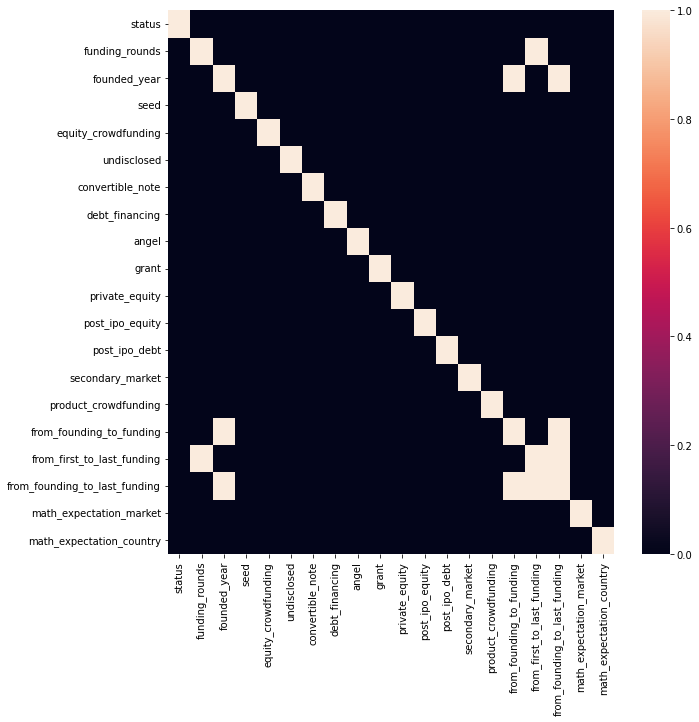

In [41]:
#HACEMOS UN HEATMAP CON LOS RESULTADOS DE LA MATRIZ DE PHIK CON VARIABLES NUMERICAS
fig, ax = plt.subplots(figsize=(10,10))  
umb= 0.5

sns.heatmap((df_transformed.phik_matrix() < -umb).astype(int) + (df_transformed.phik_matrix() > umb).astype(int))

interval columns not set, guessing: ['funding_rounds', 'seed', 'equity_crowdfunding', 'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant', 'private_equity', 'round_A', 'round_B', 'funding_total']
interval columns not set, guessing: ['funding_rounds', 'seed', 'equity_crowdfunding', 'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant', 'private_equity', 'round_A', 'round_B', 'funding_total']


<AxesSubplot:>

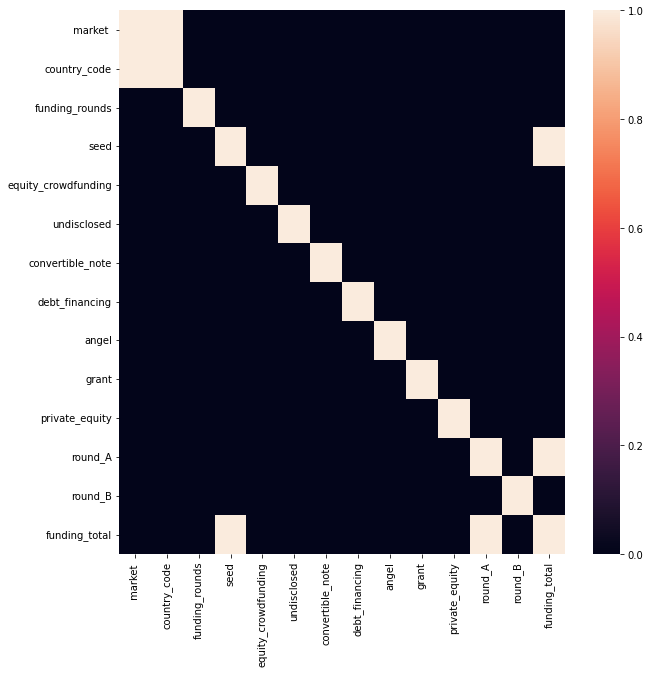

In [42]:
#MATRIZ DE PHIK CON CATEGORICAS Y NUMERICAS
X_todo_cat_num = df_clean[[' market ',
       'country_code',
       'funding_rounds', 'seed', 'equity_crowdfunding', 'undisclosed', 'convertible_note',
       'debt_financing', 'angel', 'grant', 'private_equity', 'round_A',
       'round_B', 'funding_total']]
#X_todo_cat_num.phik_matrix()

#HACEMOS UN HEATMAP CON LOS RESULTADOS DE LA MATRIZ DE PHIK
fig, ax = plt.subplots(figsize=(10,10))  
umb= 0.5

sns.heatmap((X_todo_cat_num.phik_matrix() < -umb).astype(int) + (X_todo_cat_num.phik_matrix() > umb).astype(int))

In [43]:
#SACAMOS LA SIGNIFICANCE MATRIX DE PHIK ENTRE VARIABLES CATEGORICAS Y NUMERICAS
X_todo_cat_num.significance_matrix()

interval columns not set, guessing: ['funding_rounds', 'seed', 'equity_crowdfunding', 'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant', 'private_equity', 'round_A', 'round_B', 'funding_total']


,market,country_code,funding_rounds,seed,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,round_A,round_B,funding_total
market,260.989019,15.320261,6.856599,6.117997,3.518053,2.532643,0.574566,-1.244433,4.728826,0.254368,0.361226,1.217887,-0.663825,6.710041
country_code,15.320261,227.070424,2.942540,4.695535,-0.992295,2.327295,-2.290628,3.138425,-0.560913,-0.326653,0.774302,0.243504,0.714094,11.166435
funding_rounds,6.856599,2.942540,162.958800,22.247597,-1.131294,3.277871,7.515042,13.687221,12.859492,3.891171,1.390669,18.485320,8.609795,43.181699
seed,6.117997,4.695535,22.247597,160.208080,0.087366,-1.448465,0.233164,2.646879,0.050291,0.433749,-1.653168,6.140759,0.051679,106.244022
equity_crowdfunding,3.518053,-0.992295,-1.131294,0.087366,30.010688,-0.953307,-1.204178,-1.491605,0.591763,-1.009081,-0.987257,-1.963229,0.566370,8.063913
undisclosed,2.532643,2.327295,3.277871,-1.448465,-0.953307,35.899288,0.762229,-1.534099,-2.454403,-1.265696,-1.376341,-2.008773,0.442922,12.099148
convertible_note,0.574566,-2.290628,7.515042,0.233164,-1.204178,0.762229,37.990123,-0.679107,1.336044,-1.408347,-1.566801,1.515827,-2.187129,9.740736
debt_financing,-1.244433,3.138425,13.687221,2.646879,-1.491605,-1.534099,-0.679107,71.378953,1.223620,-1.718357,0.480122,-2.237040,-0.461657,28.102847
angel,4.728826,-0.560913,12.859492,0.050291,0.591763,-2.454403,1.336044,1.223620,90.439200,0.722926,-1.695430,-0.126022,-1.244048,42.797771
grant,0.254368,-0.326653,3.891171,0.433749,-1.009081,-1.265696,-1.408347,-1.718357,0.722926,35.070562,2.913080,-1.833299,-0.364393,11.754448


In [ ]:
#representamos graficamente la significance matrix de Phik
umb= 10

sns.heatmap((X_todo_cat_num.significance_matrix() < -umb).astype(int) + (X_todo_cat_num.significance_matrix() > umb).astype(int))

#### 2.4 Feature Importance
##### 2.4.1 Random Forest

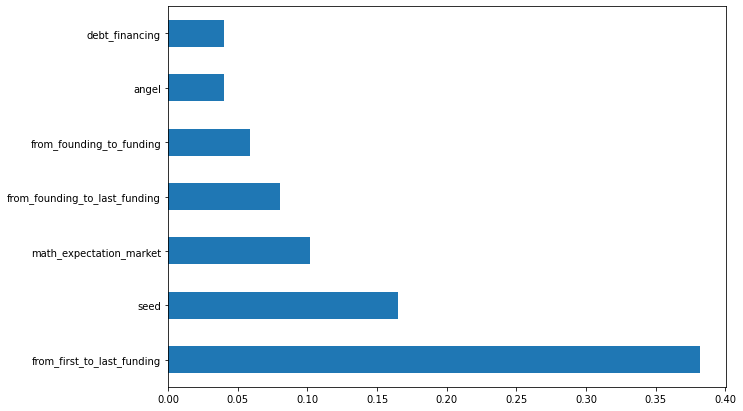

In [12]:
# FEATURE IMPORTANCE CON RANDOM FOREST
model_RFR = RandomForestRegressor(max_depth=10)
model_RFR.fit(X_train, y_train)

plt.figure(figsize=(10,7))
feat_importances = pd.Series(model_RFR.feature_importances_, index = df_transformed.columns)
feat_importances.nlargest(7).plot(kind='barh');

##### 2.4.2 Linear Regression

Feature: 0, Score: 1.58482
Feature: 1, Score: 317.62912
Feature: 2, Score: 116.20184
Feature: 3, Score: -0.48469
Feature: 4, Score: -0.50050
Feature: 5, Score: -0.27494
Feature: 6, Score: -0.45049
Feature: 7, Score: -0.26999
Feature: 8, Score: -0.65216
Feature: 9, Score: -0.36147
Feature: 10, Score: -0.21890
Feature: 11, Score: -0.20646
Feature: 12, Score: -0.51621
Feature: 13, Score: -0.19210
Feature: 14, Score: 0.01558
Feature: 15, Score: -2924.44484
Feature: 16, Score: -2924.44484
Feature: 17, Score: 2924.44484
Feature: 18, Score: 5664.68007
Feature: 19, Score: 8112.65309


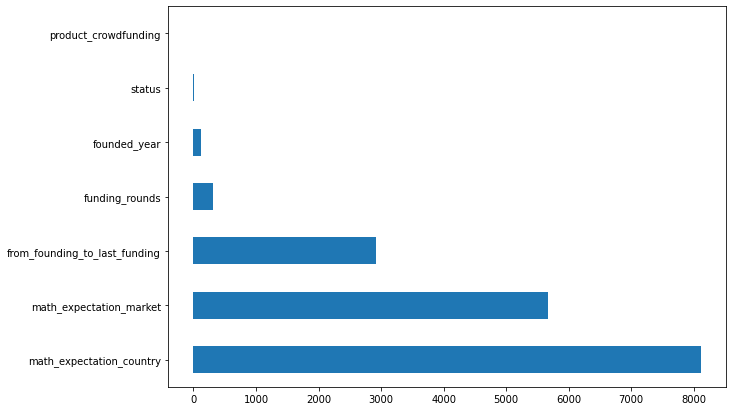

In [13]:
# FEATURE IMPORTANCE CON LINEAR REGRESSION
model_LR = LinearRegression()
model_LR.fit(X_train, y_train)

plt.figure(figsize=(10,7))
feat_importances_LR = pd.Series(model_LR.coef_, index = df_transformed.columns)
feat_importances_LR.nlargest(7).plot(kind='barh');

# get importance
importance = model_LR.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()


##### 2.4.3 SelectKBest

In [14]:

#UTILIZAMOS LA FUNCION SELECTKBEST PARA ELEGIR LAS MEJORES COLUMNAS
X_skb = df_clean[['status',
       'funding_rounds', 'founded_year', 'seed',
       'equity_crowdfunding', 'undisclosed', 'convertible_note',
       'debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_equity',
       'post_ipo_debt', 'secondary_market', 'product_crowdfunding', 'from_founding_to_funding',
       'from_first_to_last_funding', 'from_founding_to_last_funding','math_expectation_market',
       'math_expectation_country']]
y_skb = df_clean['venture']

#X_array = X_skb.to_numpy()

#SEPARAMOS X E y EN TRAIN Y TEST
X_train_skb, X_test_skb, y_train_skb, y_test_skb = train_test_split(X_skb, y_skb, test_size= size, random_state=seed)
select = SelectKBest(chi2, k=7)

Xy_new = select.fit_transform(X_train_skb, y_train_skb)


#Xy_new = pd.DataFrame(Xy_new, columns= Xy_new.columns)
print(Xy_new.shape)
print(X_skb.shape)
filter = select.get_support()
features = X_skb.columns

print('All features:', features)
print('Selected features: ', features[filter])

(15679, 7)
(19599, 20)
All features: Index(['status', 'funding_rounds', 'founded_year', 'seed',
       'equity_crowdfunding', 'undisclosed', 'convertible_note',
       'debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_equity',
       'post_ipo_debt', 'secondary_market', 'product_crowdfunding',
       'from_founding_to_funding', 'from_first_to_last_funding',
       'from_founding_to_last_funding', 'math_expectation_market',
       'math_expectation_country'],
      dtype='object')
Selected features:  Index(['undisclosed', 'debt_financing', 'post_ipo_equity', 'post_ipo_debt',
       'from_founding_to_funding', 'from_first_to_last_funding',
       'from_founding_to_last_funding'],
      dtype='object')


##### 2.4.4 Analisis fde los resultados

In [15]:
#ANALIZAMOS LAS DIFERENTES FEATURE IMPORTANCE QUE HEMOS OBTENIDO
list_features = []

list_features_skb = []
for i in features[filter]:
    list_features_skb.append(i)
    list_features.append(i)

list_features_rf = []
for i in feat_importances.nlargest(7).index:
    list_features_rf.append(i)
    list_features.append(i)

list_features_lr = []
for i in feat_importances_LR.nlargest(7).index:
    list_features_lr.append(i)
    list_features.append(i)

print('Feature Importance SKB: ', list_features_skb)
print('Feature Importance RF: ', list_features_rf)
print('Feature Importance LR: ', list_features_lr)

dicc_FI = {
'FI_SKB':  list_features_skb,
'FI_RF':  list_features_rf,
'FI_LR':  list_features_lr
}
set_features = set(list_features)

df_feature_importance = pd.DataFrame(data= dicc_FI)
display(df_feature_importance)
list_features_unique = list(set_features)
print(list_features_unique)
len(set_features)

Feature Importance SKB:  ['undisclosed', 'debt_financing', 'post_ipo_equity', 'post_ipo_debt', 'from_founding_to_funding', 'from_first_to_last_funding', 'from_founding_to_last_funding']
Feature Importance RF:  ['from_first_to_last_funding', 'seed', 'math_expectation_market', 'from_founding_to_last_funding', 'from_founding_to_funding', 'angel', 'debt_financing']
Feature Importance LR:  ['math_expectation_country', 'math_expectation_market', 'from_founding_to_last_funding', 'funding_rounds', 'founded_year', 'status', 'product_crowdfunding']


,FI_SKB,FI_RF,FI_LR
0,undisclosed,from_first_to_last_funding,math_expectation_country
1,debt_financing,seed,math_expectation_market
2,post_ipo_equity,math_expectation_market,from_founding_to_last_funding
3,post_ipo_debt,from_founding_to_last_funding,funding_rounds
4,from_founding_to_funding,from_founding_to_funding,founded_year
5,from_first_to_last_funding,angel,status
6,from_founding_to_last_funding,debt_financing,product_crowdfunding


['from_founding_to_last_funding', 'founded_year', 'funding_rounds', 'seed', 'undisclosed', 'from_founding_to_funding', 'from_first_to_last_funding', 'math_expectation_country', 'product_crowdfunding', 'status', 'post_ipo_equity', 'math_expectation_market', 'angel', 'post_ipo_debt', 'debt_financing']


15

### 2. Modelos Regresion
#### 2.1 LinearRegression

In [18]:
print('SHAPES')
print('X shape', X.shape)
print('X train shape', X_train.shape)
print('X test shape', X_test.shape)
print('y shape', y.shape)
print('y train shape', y_train.shape)
print('y test shape', y_test.shape, '\n')


SHAPES
X shape (19599, 20)
X train shape (15679, 20)
X test shape (3920, 20)
y shape (19599,)
y train shape (15679,)
y test shape (3920,) 



In [16]:
#MODELO LINEAR REGRESSION A - CON DATOS TRANSFORMADOS (mejor score y mejor MAE)
X = df_transformed[list_features_unique]
y_t = y_train_trans

X_train, X_test, y_train, y_test = train_test_split(X, y_t, test_size = size, random_state= seed)
'''
print('SHAPES')
print('X shape', X.shape)
print('X train shape', X_train.shape)
print('X test shape', X_test.shape)
print('y shape', y.shape)
print('y train shape', y_train.shape)
print('y test shape', y_test.shape, '\n')
'''
lm = LinearRegression()
lm.fit(X_train,y_train)

predictions = lm.predict(X_test)
predictions_train = lm.predict(X_train)

print('TEST SCORE')
print('test score:',lm.score(X_test, y_test))
print('train score:', lm.score(X_train, y_train),'\n')

print('ERROR TRAIN')
print('MAE:', metrics.mean_absolute_error(y_train, predictions_train))
print('MSE:', metrics.mean_squared_error(y_train, predictions_train))
print('MAPE:', metrics.mean_absolute_percentage_error(y_train, predictions_train))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, predictions_train)),'\n')

print('ERROR TEST')
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))


TEST SCORE
test score: 0.26704503257831735
train score: 0.2511179409267924 

ERROR TRAIN
MAE: 2014534.3205006695
MSE: 10083104324677.193
MAPE: 3.3641206163650684e+21
RMSE: 3175390.420826578 

ERROR TEST
MAE: 2004862.6517287937
MSE: 9644128798278.457
MAPE: 3.4642722156525765e+21
RMSE: 3105499.7662660447


#### 2.2 DecissionTreeRegressor

In [17]:
### MODELO DECISSION TREE REGRESSOR B (mejor con datos transformados)
X = df_transformed[list_features_unique]
y = y_t

X_train, X_test, y_train, y_test = train_test_split(X, y_t, test_size = size, random_state= seed)
'''
print('SHAPES')
print('X shape', X.shape)
print('X train shape', X_train.shape)
print('X test shape', X_test.shape)
print('y shape', y.shape)
print('y train shape', y_train.shape)
print('y test shape', y_test.shape, '\n')
'''
dtm = DecisionTreeRegressor(max_depth=3).fit(X_train, y_train)

predictions_dtm = dtm.predict(X_test)
predictions_dtm_train = dtm.predict(X_train)

#representamos el arbol
#plt.figure(figsize = (16,16))
#sklearn.tree.plot_tree(dtm, filled = True);

print('TEST SCORE')
print('test score:', dtm.score(X_test, y_test))
print('train score:', dtm.score(X_train, y_train),'\n')

print('ERROR TRAIN')
print('MAE:', metrics.mean_absolute_error(y_train, predictions_dtm_train))
print('MSE:', metrics.mean_squared_error(y_train, predictions_dtm_train))
print('MAPE:', metrics.mean_absolute_percentage_error(y_train, predictions_dtm_train))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, predictions_dtm_train)),'\n')

print('ERROR TEST')
print('MAE:', metrics.mean_absolute_error(y_test, predictions_dtm))
print('MSE:', metrics.mean_squared_error(y_test, predictions_dtm))
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, predictions_dtm))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_dtm)))

TEST SCORE
test score: 0.26145146527429486
train score: 0.2495389138970041 

ERROR TRAIN
MAE: 1906864.7506166652
MSE: 10104364674127.338
MAPE: 2.861201385392805e+21
RMSE: 3178736.3329045298 

ERROR TEST
MAE: 1896930.705723575
MSE: 9717728249703.957
MAPE: 2.8787504990887346e+21
RMSE: 3117327.100210043


# REVISAR LOS INPUT DE STARTUPS PARA LAS PREDICIONES

In [ ]:
### MODELO DECISSION TREE REGRESSOR
# PREDICCIONES DE UNA NUEVA STARTUP DEL PAIS: 
# STARTUP1: USA, SECTOR: SEMICONDUCTORS
# STARTUP2: SUIZA, SECTOR: BIOTECH


X = df_clean[list_features_unique]
y = df_clean['venture']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = size, random_state= seed)


dtm = DecisionTreeRegressor(max_depth=3).fit(X_train, y_train)

new_startup = [[0,0,1,0,17.9, 211, 0,0, 0, 1,0,0,0]]

predictions_new = dtm.predict(new_startup)


dtm2 = RandomForestRegressor().fit(X_train, y_train)
new_startup2 = [[0,0,1,0,0,0, 40.1, 0, 139.4, 1,0,0,0]]
new3 = [[0,0,1,0,0,0, -100, 0, 139.4, 1,0,0,0]]
predictions_new2 = dtm2.predict(new_startup2)
predictions_new3 = dtm2.predict(new3)

print('Predciccion de una startup de USA y dedicada a los semiconductores: ', predictions_new)
print('Predciccion de una startup de Suiza y que se dedica a la Biotech: ', predictions_new2)
print('Predciccion de una startup de Tailandia y que se dedica a la Biotech: ', predictions_new3)


#### 2.3 Pipeline de modelos Regression y CV

# DA UN NAN EN EL OUTPUT

In [ ]:
#MODELO CON PIPELINE - OPCION A CON PIPELINE
X = df_clean[list_features_unique]
y = df_clean['venture']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = size, random_state= seed)
'''
print('SHAPES')
print('X shape', X.shape)
print('X train shape', X_train.shape)
print('X test shape', X_test.shape)
print('y shape', y.shape)
print('y train shape', y_train.shape)
print('y test shape', y_test.shape, '\n')
'''

pipeline = Pipeline([ 
    ('power', PowerTransformer()),
    #("ployFeature", PolynomialFeatures(degree=3)),
    #('svm_reg', LinearSVR(epsilon=1.5, random_state=42)),
    ('model_RFR', RandomForestRegressor(max_depth=10)),
    #("lin_reg", LinearRegression())
])
modelo = TransformedTargetRegressor(regressor=pipeline, transformer= PowerTransformer())

'''
pip_fit = pipeline.fit(X_train, y_train)

predictions_pipe = pip_fit.predict(X_test)
predictions_pipe_train = pip_fit.predict(X_train)

print('Score train:', pip_fit.score(X_train, y_train))
print('Score test:', pip_fit.score(X_test, y_test))

print('ERROR TRAIN')
print('MAE:', metrics.mean_absolute_error(y_train, predictions_pipe_train))
print('MSE:', metrics.mean_squared_error(y_train, predictions_pipe_train))
print('MAPE:', metrics.mean_absolute_percentage_error(y_train, predictions_pipe_train))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, predictions_pipe_train)),'\n')

print('ERROR TEST')
print('MAE:', metrics.mean_absolute_error(y_test, predictions_pipe))
print('MSE:', metrics.mean_squared_error(y_test, predictions_pipe))
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, predictions_pipe))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_pipe)))
'''
cv = KFold(n_splits= 10, shuffle=True, random_state= seed)
scores = cross_val_score(modelo, X_train, y_train, scoring= 'neg_mean_absolute_error', cv= cv, n_jobs=-1)
scores= absolute(scores)
s_mean = mean(scores)
print(scores)
print('Mean MAE: %.3f' % (s_mean))

# REVISAR ESTA PREDICCION

In [ ]:
y_pred_rf = modelo.predict(X_new)

print(X_new)
print(y_pred_rf)
df_rf_pred = pd.DataFrame(data=X_new, columns= X.columns)
df_rf_pred['predicted_venture'] = y_pred_rf
df_rf_pred


# DA UN OUTPUT CON NAN


In [ ]:
#modelo_transO CON PIPELINE - OPCION A CON MAKE_PIPELINE
from sklearn.linear_model import (
    LinearRegression, TheilSenRegressor, RANSACRegressor, HuberRegressor)
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


X = df_clean[list_features_unique]
y = df_clean['venture']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = size, random_state= seed)


estimators = [('power', PowerTransformer()),
                ('OLS', LinearRegression()),
              #('Theil-Sen', TheilSenRegressor(random_state=42))
              #('RANSAC', RANSACRegressor(random_state=42)),
              #('HuberRegressor', HuberRegressor(max_iter=3)),
              #('svm_reg', LinearSVR()),
              #('modelo_trans_RFR', RandomForestRegressor(max_depth=10)),
              #('dtm_reg', DecisionTreeRegressor(max_depth=3))
              ]


for name, estimator in estimators:
    modelo_pipe = make_pipeline(PolynomialFeatures(3), estimator)
    modelo_trans = TransformedTargetRegressor(regressor=modelo_pipe, transformer= PowerTransformer())
    modelo_trans.fit(X_train, y_train)
    '''
    print(name, 'MSE: ', metrics.mean_squared_error(y_test, modelo_trans.predict(X_test)))
    print(name, 'MAE: ', metrics.mean_absolute_error(y_test, modelo_trans.predict(X_test)))
    print(name, 'Score: ', modelo_trans.score(X_train, y_train))
    print(name, 'R2 Score: ', r2_score(y_train, modelo_trans.predict(X_train)))
    '''
    cv = KFold(n_splits= 10, shuffle=True, random_state= seed)
    scores = cross_val_score(modelo, X_train, y_train, scoring= 'neg_mean_absolute_error', cv= cv, n_jobs=-1)
    scores= absolute(scores)
    s_mean = mean(scores)
    print(scores)
    print(s_mean)
    print(name, 'Mean MAE: %.3f' % (s_mean))

p-value Shapiro test Original:  0.0
p-value Shapiro test Logaritmic:  0.0
p-value Shapiro test Box-cox:  0.0


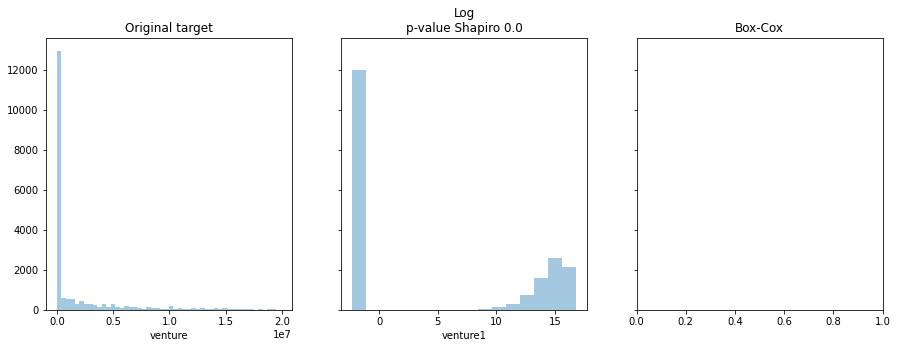

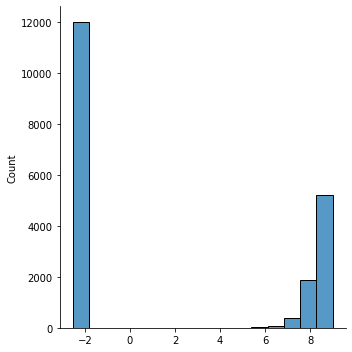

In [18]:
#TRANSFORMAMOS DE FORMA LOGARITMICA LOS DATOS PARA HACERLOS MAS GAUSIANOS
df_clean['venture1'] = df_clean['venture'] + 0.1
from scipy.stats import shapiro
from scipy import stats
stats.boxcox(df_clean['venture1'])

fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# Original target
print("p-value Shapiro test Original: ", shapiro(df_clean['venture']).pvalue)
sns.distplot(df_clean['venture'], kde=False, ax=axes[0])
axes[0].set_title("Original target")

# Logaritmic
print("p-value Shapiro test Logaritmic: ", shapiro(np.log(df_clean['venture1']),).pvalue)
sns.distplot(np.log(df_clean['venture1']),kde=False, ax=axes[1])
axes[1].set_title("Log" + '\np-value Shapiro ' + str(shapiro(np.log(df_clean['venture1']),).pvalue))

# Box-cox
print("p-value Shapiro test Box-cox: ", shapiro(stats.boxcox(df_clean['venture1'])[0]).pvalue)
sns.displot(stats.boxcox(df_clean['venture1'])[0],kde=False, ax=axes[2])
axes[2].set_title("Box-Cox");

df_clean['venture1'] = np.log(df_clean['venture1'])

## Datos gausianizados con np.log usados en random forest obtiene mejor score pero dato predictivo confuso

#### 2.4 Random Forest Regressor 

In [19]:
# create an object of the RandomForestRegressor
#HE ACTUALIZADO LOS PARAMETROS USANDO LOS BEST_PARAMS DEL GRIDSEARCH
model_RFR = RandomForestRegressor(
    max_depth= 10, 
    min_samples_leaf= 1, 
    min_samples_split= 7, 
    n_estimators= 300
    )

X = df_clean[list_features_unique]
y = df_clean['venture']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = size, random_state= seed)

# fit the model with the training data
model_RFR.fit(X_train, y_train)

# predict the target on train and test data
predict_train = model_RFR.predict(X_train)
predict_test = model_RFR.predict(X_test)

# Root Mean Squared Error on train and test data
print('MAE on train data: ', metrics.mean_absolute_error(y_train, predict_train))
print('MAE on test data: ',  metrics.mean_absolute_error(y_test, predict_test))
print('RMSE on train data: ', metrics.mean_squared_error(y_train, predict_train))
print('RMSE on test data: ',  metrics.mean_squared_error(y_test, predict_test))
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, predict_test))
print('R2 Score Train: ', r2_score(y_train, predict_train))
print('Score train: ', model_RFR.score(X_train, y_train))
print('Score test: ', model_RFR.score(X_test, y_test))

random_forest_params = { #BEST PARAMS: 300, 10, 7, 1
    #'n_estimators': [100,200,300],
    #'max_depth': [10, 20],
    #'min_samples_split': [7, 10],
    #'min_samples_leaf': [1,3]
}

grid = GridSearchCV(RandomForestRegressor(),
random_forest_params, 
cv= 10,
n_jobs= -1
)

grid.fit(X_train, y_train)
print('Best params: ', grid.best_params_)
print('Best score: ', grid.best_score_)

MAE on train data:  1490926.2090881686
MAE on test data:  1744937.9358970067
RMSE on train data:  6605015392164.768
RMSE on test data:  9163557134328.348
MAPE: 2.2710093099185956e+21
R2 Score Train:  0.5072018311542695
Score train:  0.5072018311542695
Score test:  0.361389123477194
Best params:  {}
Best score:  0.28054243386586536


In [20]:
# create an object of the SVM Regressor
#HE ACTUALIZADO LOS PARAMETROS USANDO LOS BEST_PARAMS DEL GRIDSEARCH
model_SVR = SVR(
    kernel= 'linear'
    )

X = df_transformed[list_features_unique]
y = y_train_trans

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = size, random_state= seed)

# fit the model with the training data
model_SVR.fit(X_train, y_train)

# predict the target on train and test data
predict_train = model_SVR.predict(X_train)
predict_test = model_SVR.predict(X_test)

'''
# Root Mean Squared Error on train and test data
print('MAE on train data: ', metrics.mean_absolute_error(y_train, predict_train))
print('MAE on test data: ',  metrics.mean_absolute_error(y_test, predict_test))
print('RMSE on train data: ', metrics.mean_squared_error(y_train, predict_train))
print('RMSE on test data: ',  metrics.mean_squared_error(y_test, predict_test))
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, predict_test))
print('R2 Score Train: ', r2_score(y_train, predict_train))
print('Score train: ', model_SVR.score(X_train, y_train))
print('Score test: ', model_SVR.score(X_test, y_test))
'''

cv = KFold(n_splits= 10, shuffle=True, random_state= seed)
scores = cross_val_score(model_SVR, X_train, y_train, scoring= 'neg_mean_absolute_error', cv= cv, n_jobs=-1)
scores= absolute(scores)
s_mean = mean(scores)

'''
grid = GridSearchCV(SVR(),
SVR_params, 
cv= cv,
n_jobs= -1
)

grid.fit(X_train, y_train)
print('Best params: ', grid.best_params_)
print('Best score: ', grid.best_score_)
'''
print(scores)
print('Mean MAE: %.3f' % (s_mean))

[1813426.63088686 1857430.65082306 1580246.12102836 1970972.20579914
 1800028.78581867 1858839.31976952 1633692.08518794 1747725.95890331
 1916893.87660728 1802209.74414096]
Mean MAE: 1798146.538


In [21]:
model_SVR.score(X_train, y_train)

-0.23709895875890807

#### 2.5 Diccionario de Regresores

In [22]:
#DICCIONARIO DE REGRESSORS 
#CON EL CODIGO DE ALBERTO EN EL EJERCICIO DE CLASE DE FOOTBALL STATS
X = df_clean[list_features_unique]
y = df_clean['venture']

dictionary_model_reg = {
                        "poly_model": Pipeline([
                                        ("polynomial_features", PolynomialFeatures(degree=4)),
                                        ("Linear_regression", LinearRegression())]),
                        "linear_model": LinearRegression(),
                        "support_model": SVR(),
                        'random_forest': RandomForestRegressor(max_depth= 10, 
    min_samples_leaf= 1, 
    min_samples_split= 7, 
    n_estimators= 300)}


def train_model_reg(dict_model, X, y):
    dict_scores = {"model":[], "score":[]}
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = size, random_state= seed)
    print(X_train.shape, y_train.shape)
    
    '''
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    
    
    print(scaler.fit(X))
    print(scaler.mean_)
    print(scaler.transform(X))
    '''
    for k,v in dictionary_model_reg.items():         
        v.fit(X_train, y_train)
        y_pred = v.predict(X_train)

        score = r2_score(y_train, y_pred)
   
        lista_val = [k, score]
        for i,e in enumerate(["model", "score"]):
            dict_scores[e].append(lista_val[i])

        X_train_to_show, y_train_to_show = zip(*sorted(zip(X_train, y_train)))
        plt.scatter(X_train_to_show, y_train_to_show, color='lightblue')
        X_train_to_show, y_pred = zip(*sorted(zip(X_train, y_pred)))
        plt.plot(X_train_to_show, y_pred, color='blue')
        plt.title(f"{k}")
        plt.show()
        
    return pd.DataFrame(dict_scores)


(15679, 15) (15679,)


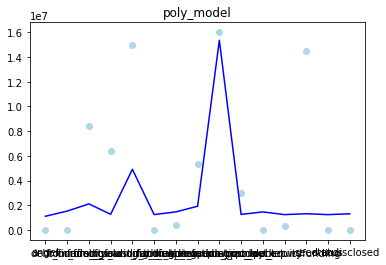

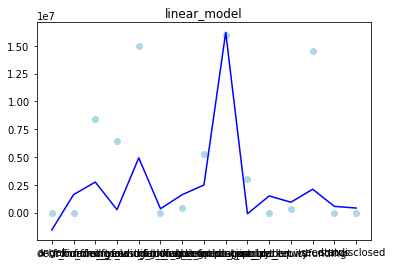

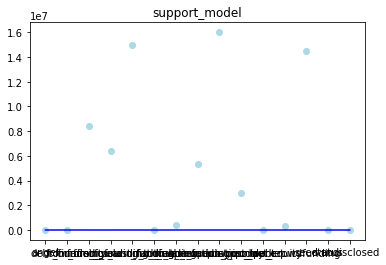

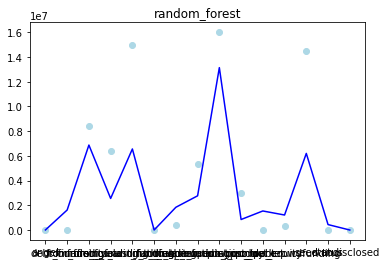

,model,score
0,poly_model,0.075599
1,linear_model,0.235385
2,support_model,-0.239797
3,random_forest,0.506174


In [23]:
#EJECUTAMOS LA FUNCION 
train_model_reg(dictionary_model_reg, X, y)

#### 2.7 Regresion con Red Neuronal

In [ ]:
import keras as kb
from keras import layers
import tensorflow as tf

X = df_clean[list_features_unique]
y = df_clean['venture']

X_train_full, X_test, y_train_full, y_test = train_test_split(X,
                                                              y)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full,
                                                      y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

model_rn = keras.Sequential([
    keras.layers.Dense(35, activation= 'relu', input_shape= X_train.shape[1:]),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1000, activation= 'relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(500, activation= 'relu'),
    keras.layers.Dense(1)
])

model_rn.compile(
    optimizer = 'Adam',
    metrics = ['mean_absolute_error'],
    loss = 'mean_absolute_error'
)

history = model_rn.fit(
    X_train,
    y_train,
    batch_size=64,
    epochs=20,
    validation_data=(X_valid, y_valid)
)

mse_test = model_rn.evaluate(X_test, y_test)
X_new = X_test[:3] # pretend these are new instances
X_new = scaler.inverse_transform(X_new)
y_pred = model_rn.predict(X_new)

In [34]:
mse_test

[1602843.25, 1602843.25]

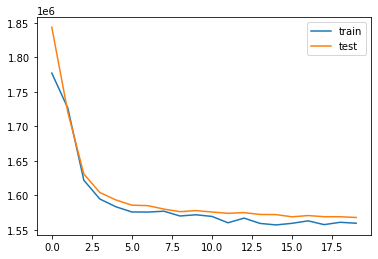

In [35]:
import matplotlib.pyplot as plt 
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [39]:

new_startups_data = scaler.inverse_transform(X_test[:20])
df_new_pred = pd.DataFrame(data=new_startups_data , columns= X.columns)
df_new_pred

,from_founding_to_last_funding,founded_year,funding_rounds,seed,undisclosed,from_founding_to_funding,from_first_to_last_funding,math_expectation_country,product_crowdfunding,status,post_ipo_equity,math_expectation_market,angel,post_ipo_debt,debt_financing
0,6.341760e+16,2010.0,1.0,325000.0,0.0,6.341760e+16,0.000000e+00,77.650555,0.0,1.0,0.0,56.400000,0.0,0.0,0.0
1,3.153600e+16,2006.0,1.0,1107075.0,0.0,3.153600e+16,0.000000e+00,0.000000,0.0,0.0,0.0,93.734348,0.0,0.0,0.0
2,1.563840e+17,2007.0,3.0,0.0,0.0,7.084800e+16,8.553600e+16,119.306251,0.0,1.0,0.0,69.047967,0.0,0.0,0.0
3,1.252800e+17,2006.0,1.0,0.0,0.0,1.252800e+17,0.000000e+00,119.306251,0.0,1.0,0.0,69.047967,0.0,0.0,0.0
4,7.776000e+15,2005.0,1.0,0.0,0.0,7.776000e+15,0.000000e+00,12.644516,0.0,2.0,0.0,0.000000,0.0,0.0,0.0
5,4.224960e+16,2008.0,2.0,140000.0,0.0,0.000000e+00,4.224960e+16,0.000000,0.0,1.0,0.0,587.970000,399450.0,0.0,0.0
6,5.261760e+16,2012.0,1.0,400000.0,0.0,5.261760e+16,0.000000e+00,32.395041,0.0,1.0,0.0,114.168932,0.0,0.0,0.0
7,1.728000e+15,2012.0,1.0,200000.0,0.0,1.728000e+15,0.000000e+00,119.306251,0.0,0.0,0.0,61.659775,0.0,0.0,0.0
8,0.000000e+00,2006.0,1.0,183687.0,0.0,0.000000e+00,0.000000e+00,79.546891,0.0,1.0,0.0,134.502941,0.0,0.0,0.0
9,4.605120e+16,2013.0,1.0,0.0,0.0,4.605120e+16,0.000000e+00,40.831250,0.0,1.0,0.0,95.681813,0.0,0.0,0.0


In [40]:
print('SHAPES')
print('X shape', X.shape)
print('X train shape', X_train.shape)
print('X test shape', X_test.shape)
print('y shape', y.shape)
print('y train shape', y_train.shape)
print('y test shape', y_test.shape, '\n')

SHAPES
X shape (19599, 15)
X train shape (11024, 15)
X test shape (4900, 15)
y shape (19599,)
y train shape (11024,)
y test shape (4900,) 



In [52]:
'''
#X_new = scaler.inverse_transform(X_new)
new_startups = scaler.inverse_transform(X_test[:3])
df_new_pred = pd.DataFrame(data=new_startups , columns= X.columns)
#df_new_pred['predicted_RedNeuron'] = y_pred

#119.306251 = USA
#12.644516 = ITA
#313.584000 = Pharmaceuticals	
#142.188824	= Games, Bangbite, Italy. Venture= 1969350
#653.300000	= Business Information Systems, Owler, Inc. California

df_new_pred
'''

,status,funding_rounds,founded_year,seed,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,from_founding_to_funding,from_first_to_last_funding,from_founding_to_last_funding,math_expectation_market,math_expectation_country
0,1.0,1.0,2011.0,0.0,0.0,0.0,200000.0,0.0,0.0,0.0,-7.275958e-12,0.0,0.0,0.0,0.0,1.068768e+17,0.000000e+00,1.068768e+17,313.584000,119.306251
1,1.0,1.0,2009.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-7.275958e-12,0.0,0.0,0.0,0.0,1.353888e+17,0.000000e+00,1.353888e+17,142.188824,12.644516
2,1.0,2.0,2011.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-7.275958e-12,0.0,0.0,0.0,0.0,2.678400e+15,4.406400e+16,4.674240e+16,653.300000,119.306251


In [36]:
#df_clean[(df_clean['math_expectation_country'] > 119) & (df_clean['math_expectation_country'] < 130)]
#df_clean[(df_clean['math_expectation_country'] > 12) & (df_clean['math_expectation_country'] < 13)]
#df_clean[(df_clean['math_expectation_market'] > 313) & (df_clean['math_expectation_market'] < 314)]
display(df_clean[(df_clean['math_expectation_market'] > 142) & (df_clean['math_expectation_market'] < 143) & (df_clean['country_code'] == 'ITA') & (df_clean['funding_rounds'] == 1)])
#df_clean[(df_clean['math_expectation_market'] > 653) & (df_clean['math_expectation_market'] < 654) & (df_clean['country_code'] == 'USA') & (df_clean['funding_rounds'] == 2)]




,permalink,name,homepage_url,category_list,market,status,country_code,state_code,region,city,...,round_F,round_G,round_H,funding_total,from_founding_to_funding,from_first_to_last_funding,from_founding_to_last_funding,math_expectation_market,math_expectation_country,venture1
16304,/organization/fungo-studios,FUNGO STUDIOS,http://www.fungostudios.com,|Games|,Games,1,ITA,NaN,Venice,Treviso,...,0.0,0.0,0.0,217320.0,15638400000000000,0,15638400000000000,142.188824,12.644516,12.289127
4374,/organization/bangbite,Bangbite,http://www.bangbite.com,|Games|,Games,1,ITA,NaN,ITA - Other,Sassari,...,0.0,0.0,0.0,1969350.0,135388800000000000,0,135388800000000000,142.188824,12.644516,14.493214
16503,/organization/gamepix,GamePix,http://www.gamepix.com/,|Games|,Games,1,ITA,NaN,Rome,Rome,...,0.0,0.0,0.0,0.0,47952000000000000,0,47952000000000000,142.188824,12.644516,-2.302585


# PREDICCIONES REGRESION

In [71]:
#actual_venture = list(y_test[:20])
new_startups_scaled = X_test[:20]

In [53]:
#new_startups_data = scaler.inverse_transform(X_test[:20])
predict_RFR = model_RFR.predict(X_test[:20])
df_new_pred['predicted_RandForest'] = predict_RFR

predict_RN = model_rn.predict(X_test[:20])
df_new_pred['predicted_NeuralNetwork'] = predict_RN
df_new_pred['actual_venture'] = actual_venture
df_new_pred['diff_pred_actual_RF'] = df_new_pred['predicted_RandForest'] - df_new_pred['actual_venture']
df_new_pred['diff_pred_actual_NN'] = df_new_pred['predicted_NeuralNetwork'] - df_new_pred['actual_venture']
df_new_pred

,from_founding_to_last_funding,founded_year,funding_rounds,seed,undisclosed,from_founding_to_funding,from_first_to_last_funding,math_expectation_country,product_crowdfunding,status,post_ipo_equity,math_expectation_market,angel,post_ipo_debt,debt_financing,predicted_RandForest,predicted_NeuralNetwork,actual_venture,diff_pred_actual_RF,diff_pred_actual_NN
0,6.341760e+16,2010.0,1.0,325000.0,0.0,6.341760e+16,0.000000e+00,77.650555,0.0,1.0,0.0,56.400000,0.0,0.0,0.0,1.965787e+06,1.972944e-01,0.0,1.965787e+06,1.972944e-01
1,3.153600e+16,2006.0,1.0,1107075.0,0.0,3.153600e+16,0.000000e+00,0.000000,0.0,0.0,0.0,93.734348,0.0,0.0,0.0,1.965787e+06,2.923777e-01,0.0,1.965787e+06,2.923777e-01
2,1.563840e+17,2007.0,3.0,0.0,0.0,7.084800e+16,8.553600e+16,119.306251,0.0,1.0,0.0,69.047967,0.0,0.0,0.0,1.967679e+06,4.558084e+06,6500000.0,-4.532321e+06,-1.941916e+06
3,1.252800e+17,2006.0,1.0,0.0,0.0,1.252800e+17,0.000000e+00,119.306251,0.0,1.0,0.0,69.047967,0.0,0.0,0.0,1.965787e+06,4.780959e+05,5000000.0,-3.034213e+06,-4.521904e+06
4,7.776000e+15,2005.0,1.0,0.0,0.0,7.776000e+15,0.000000e+00,12.644516,0.0,2.0,0.0,0.000000,0.0,0.0,0.0,1.781364e+06,2.359650e-01,64795.0,1.716569e+06,-6.479476e+04
5,4.224960e+16,2008.0,2.0,140000.0,0.0,0.000000e+00,4.224960e+16,0.000000,0.0,1.0,0.0,587.970000,399450.0,0.0,0.0,1.965787e+06,3.672479e+05,0.0,1.965787e+06,3.672479e+05
6,5.261760e+16,2012.0,1.0,400000.0,0.0,5.261760e+16,0.000000e+00,32.395041,0.0,1.0,0.0,114.168932,0.0,0.0,0.0,1.965787e+06,2.254927e-01,0.0,1.965787e+06,2.254927e-01
7,1.728000e+15,2012.0,1.0,200000.0,0.0,1.728000e+15,0.000000e+00,119.306251,0.0,0.0,0.0,61.659775,0.0,0.0,0.0,1.965787e+06,2.563784e-01,0.0,1.965787e+06,2.563784e-01
8,0.000000e+00,2006.0,1.0,183687.0,0.0,0.000000e+00,0.000000e+00,79.546891,0.0,1.0,0.0,134.502941,0.0,0.0,0.0,1.965787e+06,2.202637e-01,0.0,1.965787e+06,2.202637e-01
9,4.605120e+16,2013.0,1.0,0.0,0.0,4.605120e+16,0.000000e+00,40.831250,0.0,1.0,0.0,95.681813,0.0,0.0,0.0,1.965787e+06,2.148191e-01,2000000.0,-3.421342e+04,-2.000000e+06


In [57]:
list(df_new_pred['predicted_NeuralNetwork'])

[0.1972944140434265,
 0.29237765073776245,
 4558084.0,
 478095.90625,
 0.23596495389938354,
 367247.875,
 0.2254926562309265,
 0.2563783526420593,
 0.22026365995407104,
 0.21481913328170776,
 0.18038147687911987,
 100630.6484375,
 3419121.0,
 5514424.0,
 0.2266818881034851,
 0.2884637713432312,
 0.21467512845993042,
 0.1948968768119812,
 0.1924077868461609,
 0.25700587034225464]

In [ ]:
df_new_pred.loc[3]=[new_startups[0]]
df_new_pred.loc[4]=[new_startups[1]]
df_new_pred.loc[5]=[new_startups[2]]

### 3. MODELOS CLASIFICACION


In [62]:
#LIBRERIAS
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingRegressor
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import KFold

try:
    import xgboost
except ImportError as ex:
    print("Error: the xgboost library is not installed")
    xgboost = None


#### 3.1 Generamos una columna sintetica para poder clasificar las startups


In [63]:
#GENERAMOS UNA COLUMNA SINTETICA CON EL GRADO DE ATRACTIVO PARA INVERTIR EN UNA STARTUP
# LOW: VENTURE FUNDING < 50000
# MED: VENTURE FUNDING >= 50000 & < 2000000
# HIGH: VENTURE FUNDING >= 2000000

venture_funding = df_clean[df_clean['venture'] > 0]
venture_funding.sort_values(by= 'venture', inplace=True)
venture_funding['venture'][:50]
len(venture_funding)

venture_interest_low = df_clean[df_clean['venture'] < 50000]
venture_interest_med = df_clean[(df_clean['venture'] >= 50000) & (df_clean['venture'] < 2000000)]
venture_interest_high = df_clean[df_clean['venture'] >= 2000000]

print('Total startups on dataset clean: ', len(df_clean))
print('Startups uninteresting: ', len(venture_interest_low))
print('Startups that might be interesting: ', len(venture_interest_med))
print('Startups really attractive: ', len(venture_interest_high))

bin_labels= labels=[0, 1, 2]
df_clean['attractiveness'] = pd.cut(x=df_clean['venture'], bins=[-1,50000,2000000,40305028],labels=bin_labels)

df_clean.head()

Total startups on dataset clean:  19599
Startups uninteresting:  12151
Startups that might be interesting:  2762
Startups really attractive:  4686


,permalink,name,homepage_url,category_list,market,status,country_code,state_code,region,city,...,round_G,round_H,funding_total,from_founding_to_funding,from_first_to_last_funding,from_founding_to_last_funding,math_expectation_market,math_expectation_country,venture1,attractiveness
44370,/organization/trulysocial-apps,TrulySocial,http://www.trulysocialapps.com,|Mobile|Social Media|Online Dating|Games|,Social Media,1,GIB,NaN,GIB - Other,Gibraltar,...,0.0,0.0,1015000.0,70070400000000000,0,70070400000000000,61.659775,979.950000,-2.302585,0
47008,/organization/wave-crest-holdings,Wave Crest Group,http://www.wavecrest.gi,|Mobile Payments|Payments|Finance|,Mobile Payments,1,GIB,NaN,GIB - Other,Gibraltar,...,0.0,0.0,18929912.0,39744000000000000,41904000000000000,81648000000000000,195.990000,979.950000,16.756254,2
42463,/organization/tern,Tern,http://ternbicycles.com/tw,|Public Transportation|,Public Transportation,1,TWN,NaN,Taiwan,Taipei,...,0.0,0.0,4300000.0,85622400000000000,0,85622400000000000,59.390909,301.523077,-2.302585,0
36755,/organization/sanjet-technology,SanJet Technology,http://www.sanjetco.com,|Manufacturing|,Manufacturing,1,TWN,NaN,Taiwan,Hsinchu,...,0.0,0.0,0.0,144201600000000000,0,144201600000000000,98.487437,301.523077,-2.302585,0
34190,/organization/q-l-l-inc-ltd,Q.L.L.Inc. Ltd.,http://www.qll.co,|Language Learning|Entertainment|Apps|Education|,Education,1,TWN,NaN,Taiwan,Taipei,...,0.0,0.0,500000.0,133920000000000000,84499200000000000,218419200000000000,48.392593,301.523077,-2.302585,0


### UNDERSAMPLER. CHECK

Text(0.5, 1.0, 'RandomUnderSampler')

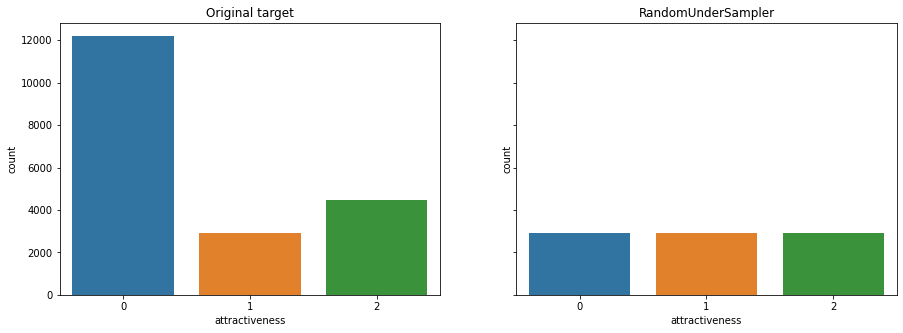

In [65]:
X = df_clean[list_features_unique]
y = df_clean['attractiveness']

rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X, y)

fig, axes = plt.subplots(1,2,figsize=(15,5), sharey=True)
# Original target
sns.countplot(x='attractiveness', data=df_clean, ax=axes[0])
axes[0].set_title("Original target")
# RandomUnderSampler
sns.countplot(y_rus, ax=axes[1])
axes[1].set_title("RandomUnderSampler")


#### 3.2 KNeighbors Classifier

In [111]:

X = df_clean[list_features_unique]
y = df_clean['attractiveness']

#KNEIGHBORS
trans = StandardScaler()
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('t', trans), ('m', model)])
# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
result_knn = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (np.mean(result_knn), np.std(result_knn)))

Accuracy: 0.675 (0.009)


#### 3.2.1 KNeighbors con RandomUNderSampler

In [67]:
X = X_rus
y = y_rus

#KNEIGHBORS
trans = StandardScaler()
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('t', trans), ('m', model)])
# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=seed)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Accuracy: 0.539 (0.014)


#### 3.3 Voting Classifier

In [89]:
#VOTING CLASSIFIER - HARD

dtr_clf = DecisionTreeClassifier(random_state = seed)
rnd_clf = RandomForestClassifier(n_estimators = 100, random_state = seed)
svm_clf = SVC(gamma='scale', random_state = seed)

voting_clf = VotingClassifier(
    estimators= [('DTC', dtr_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting = 'hard'
)
voting_clf.fit(X_train, y_train)

for clf in (dtr_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

DecisionTreeClassifier 0.47525510204081634
RandomForestClassifier 0.585204081632653


#### 3.4 Random Forest Classifier

In [106]:
#RANDOM FOREST 

X = df_clean[list_features_unique]
y = df_clean['attractiveness']

model = RandomForestClassifier(n_estimators = 100,
                max_features = 3,
                random_state = seed)

trans = StandardScaler()
pipeline = Pipeline(steps=[('t', trans), ('m', model)])
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=seed)
results_rf = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv).mean()
randomforest = model

In [107]:
#RESULTADO DE RF CON VARIABLES SIN VALANCEAR
results_rf

0.7116518736131512

In [ ]:
#RESULTADO DE RF CON VARIABLES VALANCEADO
results_rf

0.5765043610896279

#### 3.3 BAGGING

In [93]:

#BAGGING
X = df_clean[list_features_unique]
y = df_clean['attractiveness']

kfold = KFold(n_splits=10)
dtc = DecisionTreeClassifier()

model = BaggingClassifier(base_estimator=dtc,
                n_estimators = 100,
                random_state = seed)
trans = StandardScaler()
pipeline = Pipeline(steps=[('t', trans), ('m', model)])
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=seed)
bagging = model
results_bagg =  cross_val_score(pipeline, X, y, cv=cv).mean()

#### 3.4 ADA Boost

In [94]:
#ADA BOOST
X = df_clean[list_features_unique]
y = df_clean['attractiveness']

model = AdaBoostClassifier(base_estimator= DecisionTreeClassifier(max_depth=2),
            n_estimators = 30,
            random_state = seed)

adaboost = model
trans = StandardScaler()
pipeline = Pipeline(steps=[('t', trans), ('m', model)])
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=seed)
results_ada = cross_val_score(pipeline, X, y, cv=cv).mean()

#### 3.6 Gradient Boosting


In [73]:
#GRADIENT BOOST

X = df_clean[list_features_unique]
y = df_clean['attractiveness']

model = GradientBoostingClassifier(n_estimators=100,
random_state=seed)

trans = StandardScaler()
pipeline = Pipeline(steps=[('t', trans), ('m', model)])
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=seed)
results_gb = cross_val_score(pipeline, X, y, cv=cv).mean()

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
pipeline.fit(X_train, y_train)
predictions_GBC = pipeline.predict(new_startups_scaled)
predictions_GBC

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [75]:
#GRADIENT BOOST
X = X_rus
y = y_rus

model = GradientBoostingClassifier(n_estimators=100,
random_state=seed)

trans = StandardScaler()
pipeline = Pipeline(steps=[('t', trans), ('m', model)])
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=seed)
results_gb = cross_val_score(pipeline, X, y, cv=cv).mean()

X_train, X_test, y_train, y_test = train_test_split(X, y)
pipeline.fit(X_train, y_train)
predictions_GBC = pipeline.predict(new_startups_scaled)
predictions_GBC

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

#### 3.5 XGBoost

In [ ]:
#XGBoost
from sklearn.metrics import mean_squared_error, confusion_matrix
from sklearn.metrics import mean_absolute_error
import xgboost

X = df_clean[list_features_unique]
y = df_clean['attractiveness']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=size, random_state=42)

if xgboost is not None:
    xgb_reg = xgboost.XGBClassifier(random_state=seed)
    xgb_reg.fit(X_train, y_train)
    y_pred = xgb_reg.predict(X_val)
    print(confusion_matrix(y_val, y_pred))
    val_error = mean_squared_error(y_val, y_pred)
    print("Validation MSE:", val_error)

    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=seed)
    results_xgb = cross_val_score(xgb_reg, X, y, cv=cv).mean()

In [102]:
if xgboost is not None:
    xgb_reg.fit(X_train, y_train,
    eval_set=[(X_val, y_val)], early_stopping_rounds=2)
    y_pred = xgb_reg.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred)
    print("Validation MSE:", val_error)

[17:40:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-mlogloss:0.92317
[1]	validation_0-mlogloss:0.82466
[2]	validation_0-mlogloss:0.76079
[3]	validation_0-mlogloss:0.71751
[4]	validation_0-mlogloss:0.68734
[5]	validation_0-mlogloss:0.66551
[6]	validation_0-mlogloss:0.65001
[7]	validation_0-mlogloss:0.63848
[8]	validation_0-mlogloss:0.63033
[9]	validation_0-mlogloss:0.62308
[10]	validation_0-mlogloss:0.61784
[11]	validation_0-mlogloss:0.61370
[12]	validation_0-mlogloss:0.61131
[13]	validation_0-mlogloss:0.60768
[14]	validation_0-mlogloss:0.60576
[15]	validation_0-mlogloss:0.60395
[16]	validation_0-mlogloss:0.60286
[17]	validation_0-mlogloss:0.60158
[18]	validation_0-mlogloss:0.60020
[19]	validation_0-mlogloss:0.59917
[20]	validation_0-mloglos

#### 3.1 KNeighbors - Con 'status' como target

In [33]:
#CLASIFICACION CON KNEIGHBORS.
#OPCION B: CLASIFICACION DE STATUS

X = df_clean[['from_first_to_last_funding',
 'from_founding_to_funding',
 'from_founding_to_last_funding',
 'funding_rounds',
 'math_expectation_country',
 'math_expectation_market',
 'post_ipo_equity',
 'private_equity',
 'seed',
 'undisclosed']]
y = df_clean['status']

trans = StandardScaler()
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('t', trans), ('m', model)])
# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Accuracy: 0.875 (0.003)


Accuracy: 0.875 (0.003)


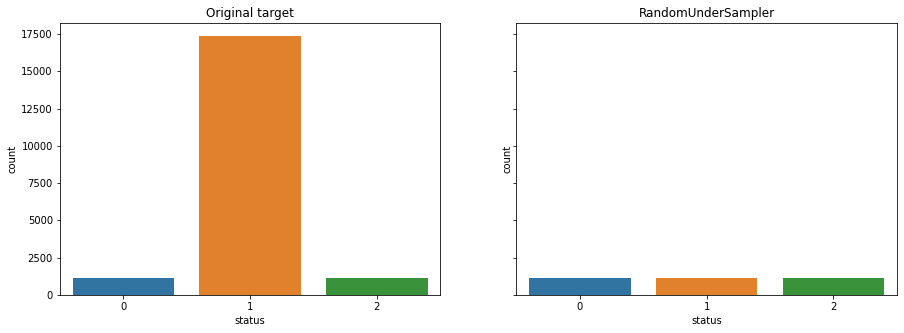

In [79]:
#CLASIFICACION CON KNEIGHBORS.
#OPCION C: CLASIFICACION DE STATUS CON DATOS BALANCEADOS
X = df_clean[['from_first_to_last_funding',
 'from_founding_to_funding',
 'from_founding_to_last_funding',
 'funding_rounds',
 'math_expectation_country',
 'math_expectation_market',
 'post_ipo_equity',
 'private_equity',
 'seed',
 'undisclosed']]
y = df_clean['status']

rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X, y)

fig, axes = plt.subplots(1,2,figsize=(15,5), sharey=True)
# Original target
sns.countplot(x='status', data=df_clean, ax=axes[0])
axes[0].set_title("Original target")
# RandomUnderSampler
sns.countplot(y_rus, ax=axes[1])
axes[1].set_title("RandomUnderSampler")

trans = StandardScaler()
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('t', trans), ('m', model)])
# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

#### 3.4 NEURAL NETWORK

In [ ]:
#CREAMOS UNA RED NEURONAL DE CLASIFICACION CON 3 NEURONAS DE SALIDA
X = df_clean[list_features_unique]
y = df_clean['attractiveness']

X_train_full, X_test, y_train_full, y_test = train_test_split(X,
                                                              y)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full,
                                                      y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

model_rnc = keras.Sequential([
    keras.layers.Dense(100, activation= 'relu', input_shape= X_train.shape[1:]),
    keras.layers.Dense(100, activation= 'relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(3, activation='softmax')
])

model_rnc.compile(
    optimizer = 'Adam',
    metrics = ["accuracy"],
    loss = "sparse_categorical_crossentropy"
)

history = model_rnc.fit(
    X_train,
    y_train,
    batch_size=128,
    epochs=30,
    validation_data=(X_valid, y_valid)
)

mse_test = model_rnc.evaluate(X_test, y_test)
#X_new = X_test[:20] # pretend these are new instances
#y_pred = model_rn.predict(new_startups_scaled)
#y_pred

In [91]:
mse_test

[0.6439318656921387, 0.7195918560028076]

In [118]:
#RESULTADOS UNIFICADOS
resultados = [results_bagg, results_rf, results_ada, results_gb, np.mean(result_knn), mse_test[1], results_xgb]
algoritmos = ["Bagging DT", "Random Forest", "Ada Boost", "GradientBoosting", "KNeighbors", 'Neural Network', 'XGBoost']

results_class = pd.Series(resultados, algoritmos).sort_values(ascending=False)
results_class

XGBoost             0.727775
Ada Boost           0.721414
Neural Network      0.719592
Random Forest       0.711652
Bagging DT          0.705938
KNeighbors          0.675119
GradientBoosting    0.632013
dtype: float64

In [85]:

predict_RNC = model_rnc.predict(new_startups_scaled)
#df_new_pred['predicted_NeuralNetworkClass'] = predict_RNC
#df_new_pred['actual_venture'] = actual_venture
#df_new_pred['diff_pred_actual_RF'] = df_new_pred['predicted_RandForest'] - df_new_pred['actual_venture']
#df_new_pred['diff_pred_actual_NNC'] = df_new_pred['predicted_NeuralNetworkClass'] - df_new_pred['actual_venture']

df_NNC_pred = pd.DataFrame(predict_RNC, columns= ['Low Interest', 'Average Interest', 'High Interest'])

array([[9.99707878e-01, 1.87532831e-04, 1.04516897e-04],
       [9.99447048e-01, 1.88360267e-04, 3.64552659e-04],
       [3.33732106e-02, 1.73600227e-01, 7.93026567e-01],
       [2.25498438e-01, 4.35555816e-01, 3.38945746e-01],
       [7.07493544e-01, 1.77855670e-01, 1.14650734e-01],
       [9.44985390e-01, 1.99899413e-02, 3.50246243e-02],
       [9.99933839e-01, 4.10404864e-05, 2.51953461e-05],
       [9.93707240e-01, 5.21798711e-03, 1.07475591e-03],
       [9.93696034e-01, 3.44338920e-03, 2.86065717e-03],
       [6.54208064e-01, 1.64436594e-01, 1.81355387e-01],
       [9.98355687e-01, 5.41950576e-04, 1.10234693e-03],
       [6.07553005e-01, 2.48085499e-01, 1.44361511e-01],
       [1.11984648e-01, 1.82105154e-01, 7.05910146e-01],
       [1.46259386e-02, 2.48612344e-01, 7.36761689e-01],
       [8.11773956e-01, 8.56669769e-02, 1.02559038e-01],
       [9.99848723e-01, 3.57903045e-05, 1.15520612e-04],
       [8.22062433e-01, 1.24487780e-01, 5.34498096e-02],
       [3.15940648e-01, 2.66801

In [159]:
#df_new_pred[['Low Interest', 'Average Interest', 'High Interest']] = predict_RNC

df_new_pred['Sharks_and_Dragons'] = y_pred_SaD

In [ ]:
#display(df_clean[(df_clean['math_expectation_market'] > 77.3) & (df_clean['math_expectation_market'] < 77.4) & (df_clean['country_code'] == 'USA') & (df_clean['funding_rounds'] == 1)])
#display(df_clean[(df_clean['math_expectation_market'] > 69) & (df_clean['math_expectation_market'] < 70) & (df_clean['country_code'] == 'USA') & (df_clean['funding_rounds'] == 1) & (df_clean['founded_year'] == 2006.0)])
#df_clean[(df_clean['math_expectation_market'] > 653) & (df_clean['math_expectation_market'] < 654) & (df_clean['country_code'] == 'USA') & (df_clean['funding_rounds'] == 2)](df_clean['math_expectation_country'] > 119) & (df_clean['math_expectation_country'] < 119.4)
#display(df_clean[(df_clean['math_expectation_market'] > 86) & (df_clean['math_expectation_market'] < 87) & (df_clean['country_code'] == 'USA') & (df_clean['funding_rounds'] == 0)])

#1 df_new_pred[2] Health&Wellness. USA. 3 Funding Rounds. 22996	/organization/knee-creations	Knee Creations	http://subchondroplasty.com	
#2 df_new_pred[3] Health&Wellness. USA. 1 Funding Rounds. 3677	/organization/attune-foods	Attune Foods	http://www.attunefoods.com
#3 df_new_pred[10] Automotive. USA, F1 funding rounds. 38748	/organization/skully-helmets	Skully Helmets	http://www.skullysystems.com/	
#4 E-Commerce. USA. 5 fundingrounds.


# ALGORITMO UNICO

In [168]:
#OPCION CON PESOS: REG=2, CLAS=2, S&D=1
#MAX SCORE: 5

''' CREAMOS NUESTRO ALGORITMO UNICO
y = a W + b W1 + c W2 + d W3 + e W4
predicted_NeuralNetwork	actual_venture	diff_pred_actual_NN	Low Interest	Average Interest	High Interest	Sharks_and_Dragons
DONDE: 
'''
a = df_new_pred['High Interest'] #high attractiveness ratio (in the neuronal network classifier)
b = df_new_pred['Average Interest'] #medium attractiveness ratio (in the neuronal network classifier)
c = df_new_pred['Low Interest'] #low attractiveness ratio (in the neuronal network classifier)
d = df_new_pred['predicted_NeuralNetwork'] #predicted funding value in USD (in the randomforest regressor algorithm)
e = df_new_pred['Sharks_and_Dragons'] #deal prediction (in the sharks_and_dragons algorithm)


#DECLARAMOS LOS PESOS W
W = 2
W1 = 1
W2 = 0.1
W3 = 0.0000005
W4 = 1

df_new_pred['Algoritmo_Unico'] = round((a * W) + (b* W1) + (c * W2) + (d * W3) + (e * W4), 2)

df_new_pred 

,from_founding_to_last_funding,founded_year,funding_rounds,seed,undisclosed,from_founding_to_funding,from_first_to_last_funding,math_expectation_country,product_crowdfunding,status,...,post_ipo_debt,debt_financing,predicted_NeuralNetwork,actual_venture,diff_pred_actual_NN,Low Interest,Average Interest,High Interest,Sharks_and_Dragons,Algoritmo_Unico
0,6.341760e+16,2010.0,1.0,325000.0,0.0,6.341760e+16,0.000000e+00,77.650555,0.0,1.0,...,0.0,0.0,1.972944e-01,0.0,1.972944e-01,0.999708,0.000188,0.000105,0.518695,0.62
1,3.153600e+16,2006.0,1.0,1107075.0,0.0,3.153600e+16,0.000000e+00,0.000000,0.0,0.0,...,0.0,0.0,2.923777e-01,0.0,2.923777e-01,0.999447,0.000188,0.000365,0.535030,0.64
2,1.563840e+17,2007.0,3.0,0.0,0.0,7.084800e+16,8.553600e+16,119.306251,0.0,1.0,...,0.0,0.0,4.558084e+06,6500000.0,-1.941916e+06,0.033373,0.173600,0.793027,0.397517,4.44
3,1.252800e+17,2006.0,1.0,0.0,0.0,1.252800e+17,0.000000e+00,119.306251,0.0,1.0,...,0.0,0.0,4.780959e+05,5000000.0,-4.521904e+06,0.225498,0.435556,0.338946,0.692109,2.07
4,7.776000e+15,2005.0,1.0,0.0,0.0,7.776000e+15,0.000000e+00,12.644516,0.0,2.0,...,0.0,0.0,2.359650e-01,64795.0,-6.479476e+04,0.707494,0.177856,0.114651,0.631560,1.11
5,4.224960e+16,2008.0,2.0,140000.0,0.0,0.000000e+00,4.224960e+16,0.000000,0.0,1.0,...,0.0,0.0,3.672479e+05,0.0,3.672479e+05,0.944985,0.019990,0.035025,0.601084,0.97
6,5.261760e+16,2012.0,1.0,400000.0,0.0,5.261760e+16,0.000000e+00,32.395041,0.0,1.0,...,0.0,0.0,2.254927e-01,0.0,2.254927e-01,0.999934,0.000041,0.000025,0.618361,0.72
7,1.728000e+15,2012.0,1.0,200000.0,0.0,1.728000e+15,0.000000e+00,119.306251,0.0,0.0,...,0.0,0.0,2.563784e-01,0.0,2.563784e-01,0.993707,0.005218,0.001075,0.625371,0.73
8,0.000000e+00,2006.0,1.0,183687.0,0.0,0.000000e+00,0.000000e+00,79.546891,0.0,1.0,...,0.0,0.0,2.202637e-01,0.0,2.202637e-01,0.993696,0.003443,0.002861,0.545289,0.65
9,4.605120e+16,2013.0,1.0,0.0,0.0,4.605120e+16,0.000000e+00,40.831250,0.0,1.0,...,0.0,0.0,2.148191e-01,2000000.0,-2.000000e+06,0.654208,0.164437,0.181355,0.371615,0.96


In [ ]:
#Reg: 800000; Clas: [0.5329959 , 0.31814143, 0.14886266]; S_and_D: 0.34
print((0.5) + (-0.5329959) + (0.31814143) + (0.14886266 * 3) + 0.34)

#Reg: 40000; Clas: [0.962353  , 0.02754593, 0.01010095]; S_and_D: 0.1
print((0.0) + (-0.962353) + (0.02754593) + (0.01010095 * 3) + 0.1)

#Reg: 2500000; Clas: [0.72237283, 0.19156206, 0.08606512]; S_and_D: 0.8
print((1) + (-0.72237283) + (0.19156206) + (0.08606512 * 3) + 0.8)

#Reg: 2500000; Clas: [0.08606512, 0.19156206, 0.72237283]; S_and_D: 0.8
print((1) + (-0.08606512) + (0.19156206) + (0.72237283 * 3) + 0.8)

### 4 MODELOS NO SUPERVISADOS

#### 4.1 KMeans


In [ ]:
#MODELO UNSUPERVISED KMEANS
df_numerical = df_clean[['status',
       'funding_rounds',
       'founded_year', 'seed',
       'venture', 'equity_crowdfunding', 'undisclosed', 'convertible_note',
       'debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_equity',
       'post_ipo_debt', 'secondary_market', 'product_crowdfunding', 'from_founding_to_funding',
       'from_first_to_last_funding', 'from_founding_to_last_funding',
       'math_expectation_market', 'math_expectation_country','attractiveness']]

from sklearn.cluster import KMeans

scaled = StandardScaler()
np_scaled = scaled.fit_transform(df_numerical)

df_scaled =pd.DataFrame(np_scaled, columns= df_numerical.columns)
k = 3
kmeans = KMeans(n_clusters = k, random_state = seed)
y_pred = kmeans.fit_predict(df_scaled)

print(len(df_scaled))
print(len(y_pred))

series = pd.Series(y_pred)
df_scaled = scaled.inverse_transform(df_scaled)

df_scaled =pd.DataFrame(df_scaled, columns= df_numerical.columns)

df_scaled['cluster_kmeans'] = series
df_scaled


17291
17291


,status,funding_rounds,founded_year,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,...,post_ipo_debt,secondary_market,product_crowdfunding,from_founding_to_funding,from_first_to_last_funding,from_founding_to_last_funding,math_expectation_market,math_expectation_country,attractiveness,cluster_kmeans
0,1.0,1.0,2007.0,0.0,6000000.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.524096e+17,0.000000e+00,1.524096e+17,91.810619,247.014286,2.0,1
1,1.0,1.0,2011.0,250000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.503360e+16,0.000000e+00,1.503360e+16,0.000000,247.014286,0.0,0
2,0.0,1.0,2009.0,0.0,0.0,0.0,0.0,0.0,0.0,66230.0,...,0.0,0.0,0.0,0.000000e+00,0.000000e+00,-8.000000e+00,42.173171,247.014286,0.0,0
3,1.0,1.0,2008.0,0.0,0.0,0.0,0.0,0.0,21595.0,0.0,...,0.0,0.0,0.0,1.020384e+17,0.000000e+00,1.020384e+17,0.000000,247.014286,0.0,2
4,1.0,1.0,2008.0,0.0,5400000.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.858464e+17,0.000000e+00,1.858464e+17,88.552291,247.014286,2.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17286,1.0,1.0,2012.0,0.0,1900000.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000e+00,0.000000e+00,-8.000000e+00,60.317442,0.000000,1.0,0
17287,1.0,2.0,2009.0,0.0,0.0,0.0,0.0,0.0,0.0,1900000.0,...,0.0,0.0,0.0,3.119040e+16,2.566080e+16,5.685120e+16,103.348506,0.000000,0.0,0
17288,1.0,1.0,2011.0,0.0,0.0,0.0,0.0,0.0,0.0,144150.0,...,0.0,0.0,0.0,0.000000e+00,0.000000e+00,-8.000000e+00,55.777419,0.000000,0.0,0
17289,1.0,1.0,2010.0,147000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.321920e+16,0.000000e+00,1.321920e+16,90.142654,0.000000,0.0,0


In [ ]:
group_kmeans = df_scaled.groupby('cluster_kmeans').agg({
    'funding_rounds': 'mean',  
    'founded_year': 'mean',
    'seed': ['mean', 'count']
})
group_kmeans

funding_rounds founded_year      seed       
                         mean         mean      mean  count
cluster_kmeans                                             
0                   -0.240098     0.386130  0.030712  11355
1                    1.111015    -0.389494  0.040517   3307
2                   -0.360522    -1.177807 -0.183616   2629

### 5. SHARKS AND DRAGONS ALGORITHM

In [137]:
#IMPORTAMOS EL CSV
df_sharks_and_dragons = pd.read_csv('../data/raw/sharks_and_dragons_dataset.csv') 
df_sharks_and_dragons.drop(columns= ['Unnamed: 0'], inplace= True)

In [138]:
df_sharks_and_dragons.columns

Index(['deal', 'description', 'entrepreneurs', 'location', 'askedFor',
       'exchangeForStake', 'valuation', 'title', 'Multiple Entreprenuers',
       'year', 'cat_Business Services', 'cat_Children/Education',
       'cat_Fashion/Beauty', 'cat_Fitness/Sports/Outdoors',
       'cat_Food and Beverage', 'cat_Green/CleanTech', 'cat_Health/Wellness',
       'cat_Lifestyle/Home', 'cat_Media/Entertainment', 'cat_Novelties',
       'cat_Pet Products', 'cat_Software/Tech', 'cat_Travel'],
      dtype='object')

<AxesSubplot:>

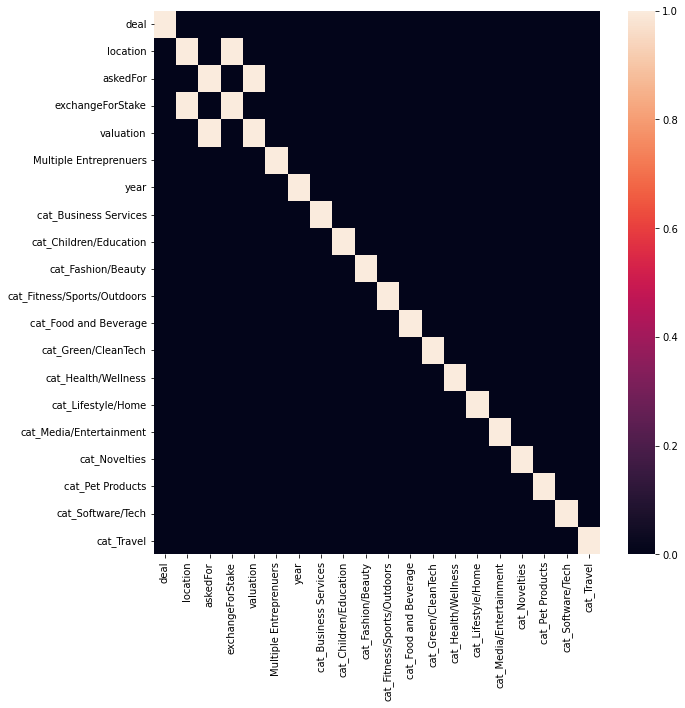

In [ ]:

fig, ax = plt.subplots(figsize=(10,10))  
umb= 0.5
sns.heatmap((df_sharks_and_dragons.corr() < -umb).astype(int) + (df_sharks_and_dragons.corr() > umb).astype(int))

<AxesSubplot:>

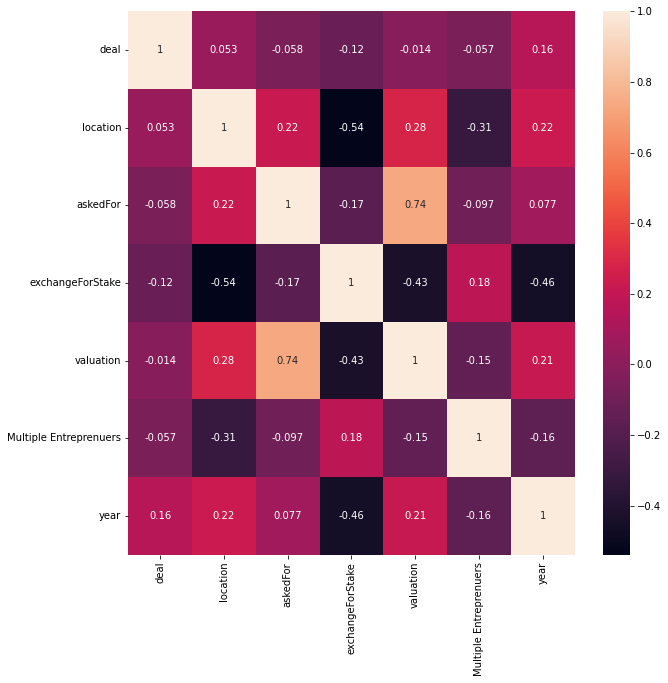

In [ ]:
matrix = df_sharks_and_dragons[['deal', 'location', 'askedFor',
       'exchangeForStake', 'valuation', 'Multiple Entreprenuers',
       'year']]

fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(matrix.corr(), annot=True)

In [139]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
#from xgboost import XGBClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection

#### 5.1 Kneighbors

In [ ]:
#CLASIFICACION CON KNEIGHBORS.
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier

X = df_sharks_and_dragons[['location', 'askedFor',
       'exchangeForStake', 'valuation', 'Multiple Entreprenuers',
       'year', 'cat_Business Services', 'cat_Children/Education',
       'cat_Fashion/Beauty', 'cat_Fitness/Sports/Outdoors',
       'cat_Food and Beverage', 'cat_Green/CleanTech', 'cat_Health/Wellness',
       'cat_Lifestyle/Home', 'cat_Media/Entertainment', 'cat_Novelties',
       'cat_Pet Products', 'cat_Software/Tech', 'cat_Travel']]
y = df_sharks_and_dragons['deal']


trans = StandardScaler()
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('t', trans), ('m', model)])
# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=seed)
results_kne_SaD = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (np.mean(results_kne_SaD), np.std(results_kne_SaD)))

Accuracy: 0.544 (0.039)


#### 5.2 Random Forest

In [ ]:
model = RandomForestClassifier(n_estimators = 100,
                max_features = 3,
                random_state = seed)

trans = StandardScaler()
pipeline = Pipeline(steps=[('t', trans), ('m', model)])
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=seed)
results_rf_SaD = model_selection.cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv).mean()
randomforest = model
results_rf_SaD

0.5584531987977672

#### 5.3 Bagging


In [ ]:
kfold = model_selection.KFold(n_splits=10)
dtc = DecisionTreeClassifier()

model = BaggingClassifier(base_estimator=dtc,
                n_estimators = 100,
                random_state = seed)
trans = StandardScaler()
pipeline = Pipeline(steps=[('t', trans), ('m', model)])
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=seed)
bagging = model
results_bagg_SaD =  model_selection.cross_val_score(pipeline, X, y, cv=cv).mean()
results_bagg_SaD

0.5538392729354517

#### 5.4 Ada Boost

In [ ]:
model = AdaBoostClassifier(base_estimator= DecisionTreeClassifier(max_depth=2),
            n_estimators = 30,
            random_state = seed)

adaboost = model
trans = StandardScaler()
pipeline = Pipeline(steps=[('t', trans), ('m', model)])
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=seed)
results_ada_SaD = model_selection.cross_val_score(pipeline, X, y, cv=cv).mean()
results_ada_SaD

0.5657757263489337

#### 5.5 Gradient Boosting


In [ ]:
model = GradientBoostingClassifier(n_estimators=100,
random_state=seed)

trans = StandardScaler()
pipeline = Pipeline(steps=[('t', trans), ('m', model)])
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=seed)
results_gb_SaD = model_selection.cross_val_score(pipeline, X, y, cv=cv).mean()
results_gb_SaD

NameError: name 'seed' is not defined

In [ ]:
params_gb_SaD= {
 #'ccp_alpha': 0.0,
 'criterion': ['friedman_mse', 'squared_error'], #, 'mse', 'mae'
 #'init': None,
 #'learning_rate': [0.1, 0.3],
 'loss': ['deviance', 'exponential'],
 #'max_depth': 3,
 #'max_features': None,
 #'max_leaf_nodes': None,
 #'min_impurity_decrease': 0.0,
 #'min_samples_leaf': 1,
 #'min_samples_split': 2,
 #'min_weight_fraction_leaf': 0.0,
 'n_estimators': [100,200]
 #'n_iter_no_change': None,
 #'random_state': 42,
 #'subsample': 1.0,
 #'tol': 0.0001,
 #'validation_fraction': 0.1,
 #'verbose': 0,
 #'warm_start': False
 }

search = GridSearchCV(model, params_gb_SaD, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv)
# execute search
result = search.fit(X, y)

# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

NameError: name 'GridSearchCV' is not defined

In [155]:
#CREAMOS UNA RED NEURONAL DE CLASIFICACION CON 1 neurona DE SALIDA
X = df_sharks_and_dragons[['location', 'askedFor',
       'exchangeForStake', 'valuation', 'Multiple Entreprenuers',
       'year', 'cat_Business Services', 'cat_Children/Education',
       'cat_Fashion/Beauty', 'cat_Fitness/Sports/Outdoors',
       'cat_Food and Beverage', 'cat_Green/CleanTech', 'cat_Health/Wellness',
       'cat_Lifestyle/Home', 'cat_Media/Entertainment', 'cat_Novelties',
       'cat_Pet Products', 'cat_Software/Tech', 'cat_Travel']]
y = df_sharks_and_dragons['deal']

X_train_full, X_test, y_train_full, y_test = train_test_split(X,
                                                              y)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full,
                                                      y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

model_rn_SaD= keras.Sequential([
    keras.layers.Dense(35, activation= 'relu', input_shape= X_train.shape[1:]),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1000, activation= 'relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model_rn_SaD.compile(
    optimizer = 'Adam',
    metrics = ["accuracy"],
    loss = "binary_crossentropy"
)

history = model_rn_SaD.fit(
    X_train,
    y_train,
    batch_size=128,
    epochs=20,
    validation_data=(X_valid, y_valid)
)

mse_test_SaD = model_rn_SaD.evaluate(X_test, y_test)
X_new_SaD = X_test[:20] # pretend these are new instances
y_pred_SaD = model_rn_SaD.predict(X_new_SaD)

Epoch 1/20
6/6 [==============================] - 1s 32ms/step - loss: 0.6925 - accuracy: 0.5437 - val_loss: 0.6832 - val_accuracy: 0.5938
Epoch 2/20
6/6 [==============================] - 0s 7ms/step - loss: 0.6737 - accuracy: 0.5828 - val_loss: 0.6729 - val_accuracy: 0.6133
Epoch 3/20
6/6 [==============================] - 0s 8ms/step - loss: 0.6721 - accuracy: 0.6023 - val_loss: 0.6700 - val_accuracy: 0.5820
Epoch 4/20
6/6 [==============================] - 0s 8ms/step - loss: 0.6748 - accuracy: 0.5893 - val_loss: 0.6742 - val_accuracy: 0.5820
Epoch 5/20
6/6 [==============================] - 0s 8ms/step - loss: 0.6743 - accuracy: 0.5828 - val_loss: 0.6772 - val_accuracy: 0.6055
Epoch 6/20
6/6 [==============================] - 0s 9ms/step - loss: 0.6711 - accuracy: 0.5737 - val_loss: 0.6714 - val_accuracy: 0.5898
Epoch 7/20
6/6 [==============================] - 0s 9ms/step - loss: 0.6749 - accuracy: 0.5632 - val_loss: 0.6711 - val_accuracy: 0.5977
Epoch 8/20
6/6 [=================

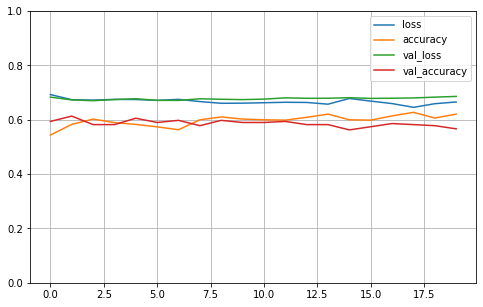

In [156]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [152]:
'''
startup1_SaD = [1,100000.0,	15.0,	666667.0,	1,	2013.0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0] 
startup2_SaD = [1,200000.0,	10.0,	2000000.0,	1,	2013.0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0]
startup3_SaD = [1,80000.0,	20.0,	400000.0,	1,	2013.0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0]

print(mse_test_SaD)


pred_startup1_SaD = model_rn_SaD.predict(startup1_SaD)
pred_startup2_SaD = model_rn_SaD.predict(startup2_SaD)
pred_startup3_SaD = model_rn_SaD.predict(startup3_SaD)
'''

In [ ]:
resultados = [results_bagg_SaD, results_rf_SaD, results_ada_SaD, results_gb_SaD, np.mean(results_kne_SaD), mse_test_SaD[1]]
algoritmos = ["Bagging DT", "Random Forest", "Ada Boost", "GradientBoosting", 'KNeighbors', 'Red Neuronal']

result = pd.Series(resultados, algoritmos).sort_values(ascending=False)
result

GradientBoosting    0.576796
Ada Boost           0.565776
Random Forest       0.558453
Bagging DT          0.553839
Red Neuronal        0.546784
KNeighbors          0.544341
dtype: float64

#### 5.2 Unsupervised - KMeans

In [ ]:
#MODELO UNSUPERVISED KMEANS
from sklearn.cluster import KMeans
X = df_sharks_and_dragons[['deal', 'location', 'askedFor',
       'exchangeForStake', 'valuation', 'Multiple Entreprenuers',
       'year', 'cat_Business Services', 'cat_Children/Education',
       'cat_Fashion/Beauty', 'cat_Fitness/Sports/Outdoors',
       'cat_Food and Beverage', 'cat_Green/CleanTech', 'cat_Health/Wellness',
       'cat_Lifestyle/Home', 'cat_Media/Entertainment', 'cat_Novelties',
       'cat_Pet Products', 'cat_Software/Tech', 'cat_Travel']]

seed = 42
scaled = StandardScaler()
np_scaled = scaled.fit_transform(X)

df_scaled =pd.DataFrame(np_scaled, columns= X.columns)
k = 3
kmeans = KMeans(n_clusters = k, random_state = seed)
y_pred = kmeans.fit_predict(df_scaled)

print(len(df_scaled))
print(len(y_pred))

series = pd.Series(y_pred)

df_scaled['cluster_kmeans'] = series

group_kmeans2 = df_scaled.groupby('cluster_kmeans').agg({ 
    'askedFor': 'mean',
    'valuation': 'mean',
    'location': 'count'
})
group_kmeans2

1365
1365


,askedFor,valuation,location
cluster_kmeans,,,
0,-0.069491,-0.041004,835
1,2.010719,2.260391,101
2,-0.338129,-0.452358,429
